# Import Package

In [2]:
#Library

#Basic data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Statistics
from scipy.stats import normaltest, norm
from scipy import stats

#Pre-Processing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.pipeline import Pipeline

#Algorithm models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


#Metric evaluation
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

#Other
from jupyterthemes import jtplot

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
jtplot.style(theme='grade3')

# Import Data

In [5]:
df=pd.read_csv('df_predict.csv',low_memory=False)
df

,building_code_description,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,interior_condition,location,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,other_building,parcel_number,parcel_shape,sale_date,sale_price,street_designation,topography,total_area,total_livable_area,unfinished,view_type,year_built,zip_code,zoning,new_zoning,sale_year,sale_year_group,parking_spaces,overall_condition,property_age
0,ROW W/GAR 3 STY MASONRY,Single Family,N,49.0,5.0,0,15.90,5.0,108 WHARTON ST,186800.0,2.0,4.0,7.0,3.0,N,11000600,E,1951-01-31,1.0,ST,F,779.0,1650.0,F,I,1920.0,19147,RSA5,Residential Single Family,1951.0,1955-1951,1,5.0,100.0
1,ROW 3 STY MASONRY,Single Family,Y,49.0,2.0,0,15.90,2.0,110 WHARTON ST,341600.0,1.0,3.0,4.0,3.0,N,11000700,E,2017-04-14,395000.0,ST,F,779.1,1203.0,F,I,1920.0,19147,RSA5,Residential Single Family,2017.0,2020-2016,0,2.0,100.0
2,ROW 3 STY MASONRY,Single Family,N,49.0,4.0,0,14.80,4.0,112 WHARTON ST,226200.0,1.0,4.0,5.0,2.0,N,11000800,E,1975-09-04,1.0,ST,F,725.2,1482.0,F,I,1920.0,19147,RSA5,Residential Single Family,1975.0,1975-1971,0,4.0,100.0
3,ROW 3 STY MASONRY,Single Family,Y,100.0,4.0,0,14.33,4.0,114 WHARTON ST,241500.0,2.0,4.0,8.0,2.0,N,11000900,E,2012-02-16,1.0,ST,F,1433.0,2049.0,F,I,1920.0,19147,RSA5,Residential Single Family,2012.0,2015-2011,0,4.0,100.0
4,ROW 3 STY MASONRY,Single Family,N,100.0,4.0,0,15.00,4.0,116 WHARTON ST,237000.0,2.0,4.0,6.0,3.0,N,11001000,E,2017-07-21,1.0,ST,F,1500.0,1155.0,F,I,1920.0,19147,RSA5,Residential Single Family,2017.0,2020-2016,0,4.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495385,RES CONDO 3 STY MAS+OTH,Single Family,Y,62.0,1.0,0,16.80,1.0,1401 N 2ND ST,344900.0,3.0,3.0,6.0,3.0,N,888181016,E,2015-05-15,365000.0,ST,F,1041.6,1854.0,F,I,2015.0,19122,RSA5,Residential Single Family,2015.0,2015-2011,1,1.0,5.0
495386,RES CONDO 3 STY MAS+OTH,Single Family,Y,62.0,1.0,0,16.80,1.0,1401 N 2ND ST,349500.0,2.0,3.0,5.0,3.0,N,888181018,E,2015-05-20,369000.0,ST,F,1041.6,1571.0,F,I,2015.0,19122,RSA5,Residential Single Family,2015.0,2015-2011,1,1.0,5.0
495387,RES CONDO 3 STY MAS+OTH,Single Family,Y,45.0,1.0,0,18.00,1.0,1306 HOPE ST,240000.0,1.0,2.0,4.0,3.0,N,888181020,E,2015-09-04,255000.0,ST,F,810.0,1041.0,F,I,2015.0,19122,RSA5,Residential Single Family,2015.0,2015-2011,1,1.0,5.0
495388,RES CONDO 3 STY MAS+OTH,Single Family,Y,45.0,1.0,0,18.00,1.0,1306 HOPE ST,288200.0,1.0,2.0,4.0,3.0,N,888181022,E,2018-12-14,324500.0,ST,F,810.0,1134.0,F,I,2015.0,19122,RSA5,Residential Single Family,2018.0,2020-2016,1,1.0,5.0


In [6]:
df['zip_code']=df['zip_code'].apply(lambda x: str(x))

In [7]:
df_describe =[]

for i in df.columns:
    df_describe.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum())/(len(df)))*100),2),
        df[i].nunique(),
        df[i].unique()
    ])

In [8]:
# Data description
desc=pd.DataFrame(df_describe, columns=['column','type','nan','nan%','nunique','unique'])
desc

,column,type,nan,nan%,nunique,unique
0,building_code_description,object,0,0.0,444,"[ROW W/GAR 3 STY MASONRY, ROW 3 STY MASONRY, R..."
1,category_code_description,object,0,0.0,6,"[Single Family, Multi Family, Commercial, Mixe..."
2,central_air,object,0,0.0,3,"[N, Y, 0]"
3,depth,float64,0,0.0,17825,"[49.0, 100.0, 90.0, 32.0, 60.0, 48.0, 45.46, 4..."
4,exterior_condition,float64,0,0.0,8,"[5.0, 2.0, 4.0, 3.0, 1.0, 6.0, 7.0, 0.0]"
5,fireplaces,object,0,0.0,5,"[0, 1, 2, 3, >3]"
6,frontage,float64,0,0.0,10866,"[15.9, 14.8, 14.33, 15.0, 29.17, 18.03, 18.05,..."
7,interior_condition,float64,0,0.0,8,"[5.0, 2.0, 4.0, 3.0, 1.0, 6.0, 7.0, 0.0]"
8,location,object,0,0.0,492389,"[108 WHARTON ST, 110 WHARTON ST, 112 WHARTON S..."
9,market_value,float64,0,0.0,14965,"[186800.0, 341600.0, 226200.0, 241500.0, 23700..."


# Feature Selection

## Based on Domain Knowledge
Feature selection in this part still based on domain knowledge. We need to check the meaning and the relevancy of every columns with the predictive target (market value of property). If there any columns that hasn't relationship with target, we will not use it in modelling.

### Numerical Feature

In [9]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O'] #list comprehention for selecting non object data type in dataframe
numerical_feature.remove('sale_price')
numerical_feature.remove('market_value')
print ('Number of numerical feature:' , len(numerical_feature))

df[numerical_feature].head()

Number of numerical feature: 15


,depth,exterior_condition,frontage,interior_condition,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,parcel_number,total_area,total_livable_area,year_built,sale_year,overall_condition,property_age
0,49.0,5.0,15.90,5.0,2.0,4.0,7.0,3.0,11000600,779.0,1650.0,1920.0,1951.0,5.0,100.0
1,49.0,2.0,15.90,2.0,1.0,3.0,4.0,3.0,11000700,779.1,1203.0,1920.0,2017.0,2.0,100.0
2,49.0,4.0,14.80,4.0,1.0,4.0,5.0,2.0,11000800,725.2,1482.0,1920.0,1975.0,4.0,100.0
3,100.0,4.0,14.33,4.0,2.0,4.0,8.0,2.0,11000900,1433.0,2049.0,1920.0,2012.0,4.0,100.0
4,100.0,4.0,15.00,4.0,2.0,4.0,6.0,3.0,11001000,1500.0,1155.0,1920.0,2017.0,4.0,100.0


Numerical feature after feature selection based on domain knowledge:
1. number_of_bedrooms
2. number_of_rooms
3. number_stories
4. overall_condition
5. property_age
6. sale_year
7. total_area
8. total_livable_area

We need to drop several columns because value from these columns can be represented by selected columns. Example:
1. overall_condition columns is the combination between exterior_condition and interior condition, overall_condition can represent value from exterior_condition and interior condition.
2. total_area values are multiplication value of depth and frontage, so total_area can represent value from depth and frontage.
3. property_age come from year_built column, so we choose property_age over year_built column since it contain similiar value.
4. we don't need parcel_number since it has many unique values.

### Categorical Feature

In [10]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes == 'O'] #list comprehention for selecting non object data type in dataframe
print ('Number of categorical feature:' , len(categorical_feature))

df[categorical_feature].head()

Number of categorical feature: 17


,building_code_description,category_code_description,central_air,fireplaces,location,other_building,parcel_shape,sale_date,street_designation,topography,unfinished,view_type,zip_code,zoning,new_zoning,sale_year_group,parking_spaces
0,ROW W/GAR 3 STY MASONRY,Single Family,N,0,108 WHARTON ST,N,E,1951-01-31,ST,F,F,I,19147,RSA5,Residential Single Family,1955-1951,1
1,ROW 3 STY MASONRY,Single Family,Y,0,110 WHARTON ST,N,E,2017-04-14,ST,F,F,I,19147,RSA5,Residential Single Family,2020-2016,0
2,ROW 3 STY MASONRY,Single Family,N,0,112 WHARTON ST,N,E,1975-09-04,ST,F,F,I,19147,RSA5,Residential Single Family,1975-1971,0
3,ROW 3 STY MASONRY,Single Family,Y,0,114 WHARTON ST,N,E,2012-02-16,ST,F,F,I,19147,RSA5,Residential Single Family,2015-2011,0
4,ROW 3 STY MASONRY,Single Family,N,0,116 WHARTON ST,N,E,2017-07-21,ST,F,F,I,19147,RSA5,Residential Single Family,2020-2016,0


In [11]:
df[categorical_feature].describe(include=object).T

,count,unique,top,freq
building_code_description,495390,444,ROW 2 STY MASONRY,176534
category_code_description,495390,6,Single Family,427156
central_air,495390,3,0,233117
fireplaces,495390,5,0,481781
location,495390,492389,112 N 2ND ST,183
other_building,495390,2,N,494609
parcel_shape,495390,5,E,457366
sale_date,495390,22535,1943-01-01,375
street_designation,495390,23,ST,364770
topography,495390,7,F,461324


Categorical feature after feature selection based on domain knowledge:
1. building_code_description
2. category_code_description
3. central_air
4. fireplaces
5. new_zoning
6. other_building
7. parcel_shape
8. parking_spaces
9. street_designation
10. topography
11. unfinished
12. view_type
13. zip_code 

Here is several columns that we drop:
1. location, because it contain many unique values.
2. sale_date and sale_year_group, because it contain many unique values and can be replace by sale_year value.
3. zoning, because we replace its values by create new_zoning columns.

## Based on EDA and Outlier Analysis

In this section, EDA has a purpose to clean the data for modelling. Different purpose from EDA in data analysis.

### Numerical Feature

In [12]:
# Check the data distribution of numerical features
a=[]
b=[]
c=[]
for feature in ['number_of_bedrooms','number_of_rooms','number_stories','overall_condition','property_age',
                'sale_year','total_area','total_livable_area']:
    t,pval=normaltest(df[feature])
    a.append(feature)
    b.append(t)
    c.append(pval)
pd.DataFrame({'feature':a,'statistics':b, 'p-value':c})

,feature,statistics,p-value
0,number_of_bedrooms,1.148223e+06,0.0
1,number_of_rooms,1.183700e+06,0.0
2,number_stories,9.678649e+05,0.0
3,overall_condition,1.260157e+05,0.0
4,property_age,5.582315e+04,0.0
5,sale_year,1.132798e+05,0.0
6,total_area,3.367957e+06,0.0
7,total_livable_area,1.691928e+06,0.0


In [13]:
corr=df[numerical_feature].corr(method='spearman')

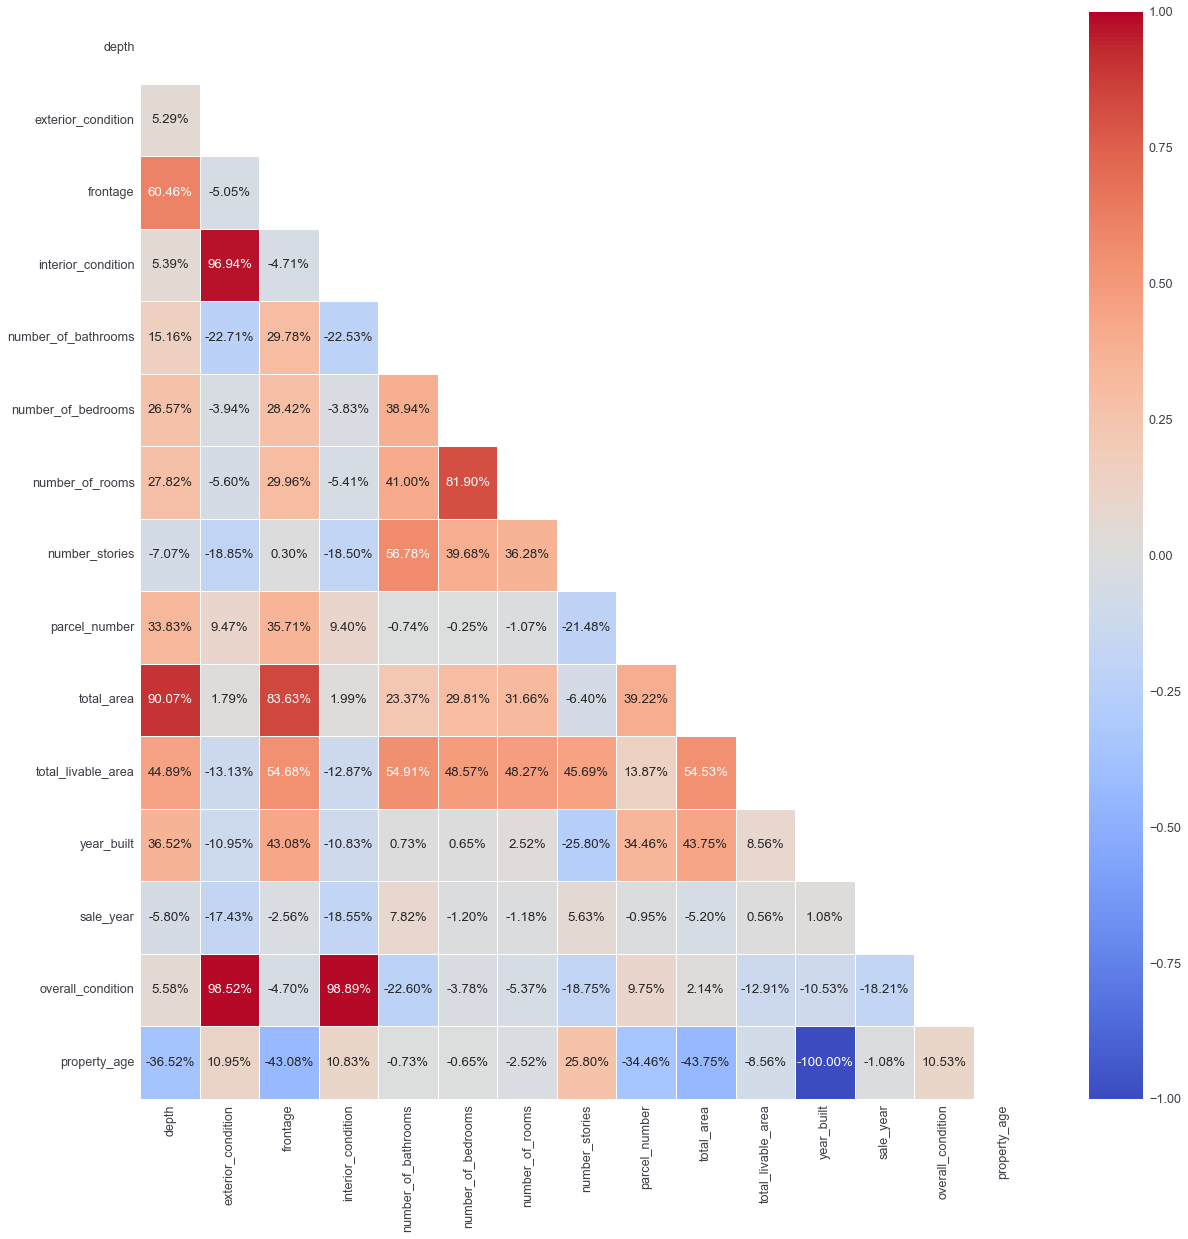

In [14]:
# Heatmap of correlation between numerical features
plt.figure(figsize=(20,20))
mask=np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt='.2%', linewidth=1, mask=mask)
plt.show()

There is another reason why we choose selected features. Based on correlation heatmap above, we try to avoid high multicollinearity between numerical features, so we just pick one selected feature if there are some feature with high correlation between the others.

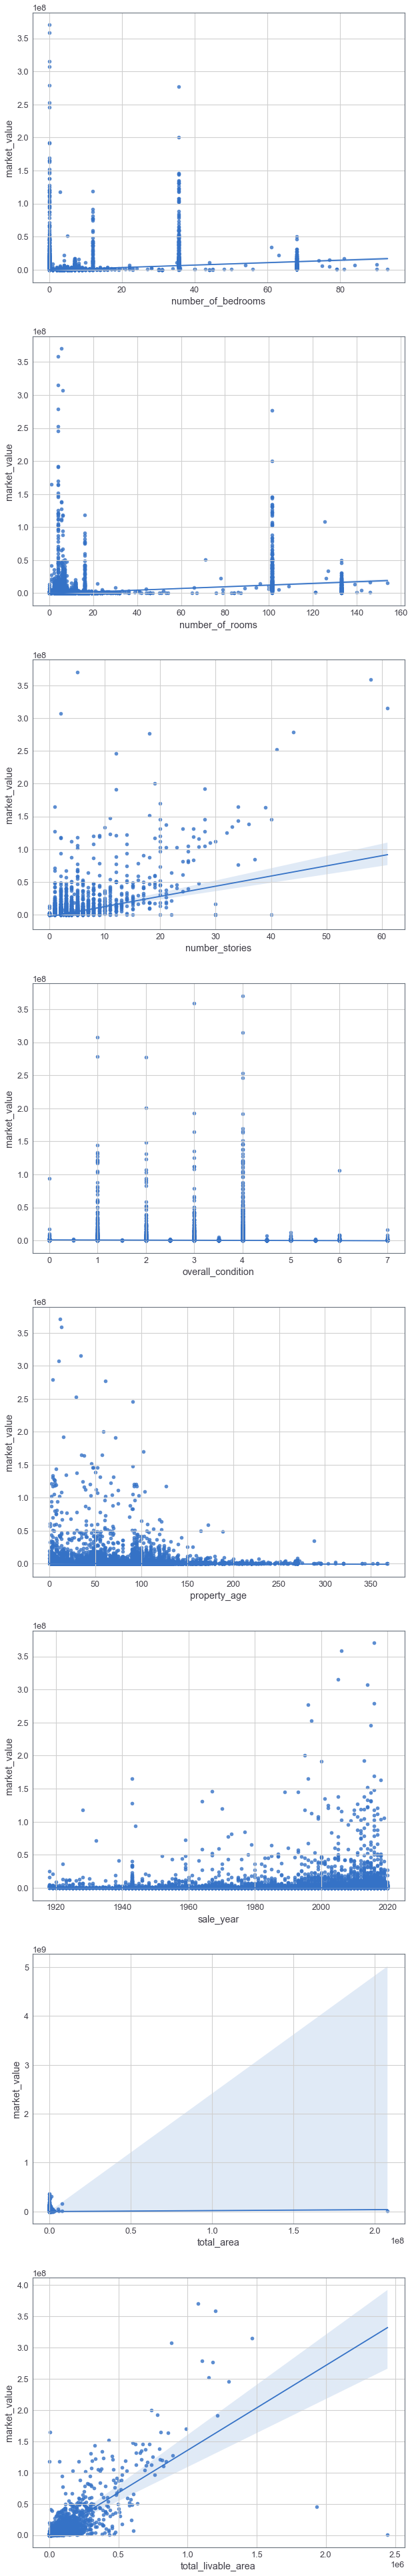

In [14]:
fig, ax = plt.subplots(8,1, figsize=(10,70))
for variable, subplot in zip(['number_of_bedrooms','number_of_rooms','number_stories','overall_condition','property_age',
                              'sale_year','total_area','total_livable_area'], ax.flatten()):
    sns.regplot(data=df, y='market_value', x=variable, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

From regplot above, there are some distinct contextual outliers that we can track especially from total_area and total_livable area. We try to drop those values so we can get better regplot result.

#### Contextual Outlier Analysis

From regplot above we try to define cutoff for outliers, here's our results:
1. Values above 20.000.000 in total_area are considered to be outliers.
2. Values above 1.250.000 in total_livable_area are considered to be outliers.

In [15]:
df[(df['total_area']>20000000) | (df['total_livable_area']>1250000)]

,building_code_description,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,interior_condition,location,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,other_building,parcel_number,parcel_shape,sale_date,sale_price,street_designation,topography,total_area,total_livable_area,unfinished,view_type,year_built,zip_code,zoning,new_zoning,sale_year,sale_year_group,parking_spaces,overall_condition,property_age
30907,APT 2-4 UNITS 3 STY MASON,Multi Family,Y,66.00,4.0,0,24.33,4.0,701 SOUTH ST,751000.0,2.0,4.0,10.0,3.0,N,53088615,E,2011-07-29,429000.0,ST,F,1.605780e+03,2445358.0,F,I,1975.0,19147,RM1,Residential Multi Family,2011.0,2015-2011,2,4.0,45.0
460147,SCHOOL 3 STY MASONRY,Commercial,0,200.00,4.0,0,531.54,4.0,4420 HAVERFORD AVE,44857200.0,4.5,0.0,6.0,3.0,N,783206951,A,1958-03-03,1.0,AVE,F,4.838960e+05,1935584.0,F,I,1965.0,19104,RSA2,Residential Single Family,1958.0,1960-1956,0,4.0,55.0
461112,SCHOOL 2 STY MASONRY,Commercial,0,43560.00,5.0,0,4768.00,5.0,2400 N 57TH ST,8392700.0,1.0,0.0,7.0,2.0,N,783766600,E,1948-09-15,1.0,ST,F,2.076941e+08,111198.0,F,I,1950.0,19131,SPINS,Special Purpose Institution,1948.0,1950-1946,0,5.0,70.0
468123,IND WAREHOUSE MASONRY,Industrial,0,528.00,4.0,0,224.54,4.0,401 N BROAD ST,245769000.0,1.0,0.0,4.0,12.0,N,874900000,A,2015-10-06,10.0,ST,F,1.179310e+05,1296804.0,F,I,1929.0,19108,I2,Industrial,2015.0,2015-2011,1,4.0,91.0
489496,OFF BLD COM NO GAR MASON,Commercial,0,167.54,4.0,0,196.58,4.0,1650 MARKET ST,315046100.0,1.0,0.0,4.0,61.0,N,883031676,A,2005-08-31,10.0,ST,F,3.287600e+04,1464000.0,F,I,1986.0,19103,CMX5,Mixed Used,2005.0,2005-2001,0,4.0,34.0


In [16]:
index_out=df[(df['total_area']>20000000) | (df['total_livable_area']>1250000)].index

In [17]:
df.drop(index=index_out, axis=0, inplace=True)

In [18]:
df.reset_index(drop=True)

,building_code_description,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,interior_condition,location,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,other_building,parcel_number,parcel_shape,sale_date,sale_price,street_designation,topography,total_area,total_livable_area,unfinished,view_type,year_built,zip_code,zoning,new_zoning,sale_year,sale_year_group,parking_spaces,overall_condition,property_age
0,ROW W/GAR 3 STY MASONRY,Single Family,N,49.0,5.0,0,15.90,5.0,108 WHARTON ST,186800.0,2.0,4.0,7.0,3.0,N,11000600,E,1951-01-31,1.0,ST,F,779.0,1650.0,F,I,1920.0,19147,RSA5,Residential Single Family,1951.0,1955-1951,1,5.0,100.0
1,ROW 3 STY MASONRY,Single Family,Y,49.0,2.0,0,15.90,2.0,110 WHARTON ST,341600.0,1.0,3.0,4.0,3.0,N,11000700,E,2017-04-14,395000.0,ST,F,779.1,1203.0,F,I,1920.0,19147,RSA5,Residential Single Family,2017.0,2020-2016,0,2.0,100.0
2,ROW 3 STY MASONRY,Single Family,N,49.0,4.0,0,14.80,4.0,112 WHARTON ST,226200.0,1.0,4.0,5.0,2.0,N,11000800,E,1975-09-04,1.0,ST,F,725.2,1482.0,F,I,1920.0,19147,RSA5,Residential Single Family,1975.0,1975-1971,0,4.0,100.0
3,ROW 3 STY MASONRY,Single Family,Y,100.0,4.0,0,14.33,4.0,114 WHARTON ST,241500.0,2.0,4.0,8.0,2.0,N,11000900,E,2012-02-16,1.0,ST,F,1433.0,2049.0,F,I,1920.0,19147,RSA5,Residential Single Family,2012.0,2015-2011,0,4.0,100.0
4,ROW 3 STY MASONRY,Single Family,N,100.0,4.0,0,15.00,4.0,116 WHARTON ST,237000.0,2.0,4.0,6.0,3.0,N,11001000,E,2017-07-21,1.0,ST,F,1500.0,1155.0,F,I,1920.0,19147,RSA5,Residential Single Family,2017.0,2020-2016,0,4.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495380,RES CONDO 3 STY MAS+OTH,Single Family,Y,62.0,1.0,0,16.80,1.0,1401 N 2ND ST,344900.0,3.0,3.0,6.0,3.0,N,888181016,E,2015-05-15,365000.0,ST,F,1041.6,1854.0,F,I,2015.0,19122,RSA5,Residential Single Family,2015.0,2015-2011,1,1.0,5.0
495381,RES CONDO 3 STY MAS+OTH,Single Family,Y,62.0,1.0,0,16.80,1.0,1401 N 2ND ST,349500.0,2.0,3.0,5.0,3.0,N,888181018,E,2015-05-20,369000.0,ST,F,1041.6,1571.0,F,I,2015.0,19122,RSA5,Residential Single Family,2015.0,2015-2011,1,1.0,5.0
495382,RES CONDO 3 STY MAS+OTH,Single Family,Y,45.0,1.0,0,18.00,1.0,1306 HOPE ST,240000.0,1.0,2.0,4.0,3.0,N,888181020,E,2015-09-04,255000.0,ST,F,810.0,1041.0,F,I,2015.0,19122,RSA5,Residential Single Family,2015.0,2015-2011,1,1.0,5.0
495383,RES CONDO 3 STY MAS+OTH,Single Family,Y,45.0,1.0,0,18.00,1.0,1306 HOPE ST,288200.0,1.0,2.0,4.0,3.0,N,888181022,E,2018-12-14,324500.0,ST,F,810.0,1134.0,F,I,2015.0,19122,RSA5,Residential Single Family,2018.0,2020-2016,1,1.0,5.0


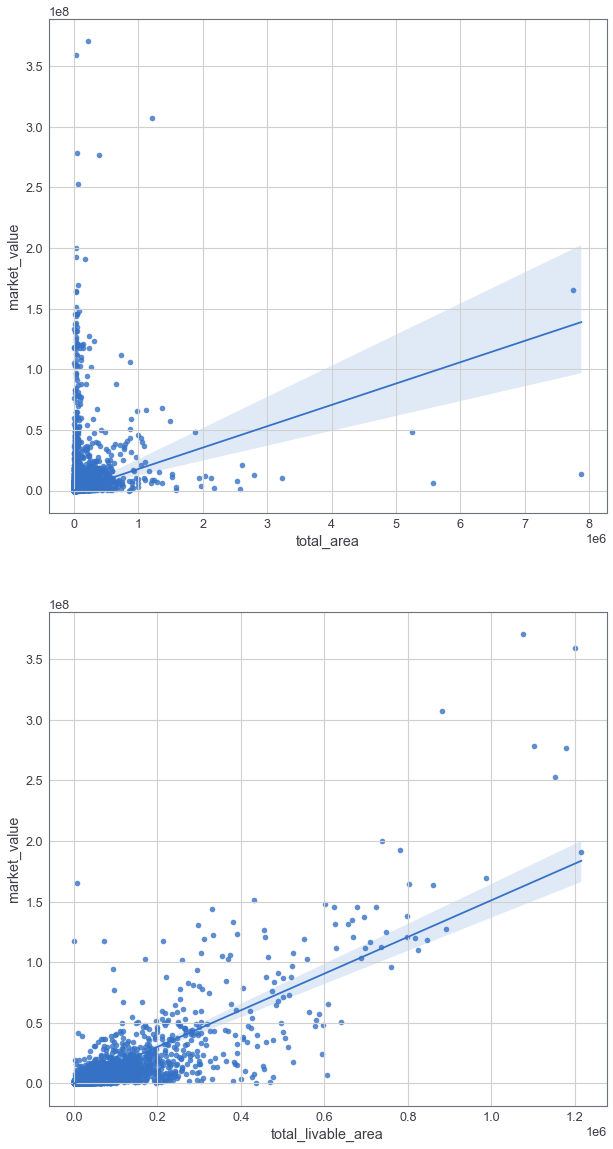

In [19]:
fig, ax = plt.subplots(2,1, figsize=(10,20))
for variable, subplot in zip(['total_area','total_livable_area'], ax.flatten()):
    sns.regplot(data=df, y='market_value', x=variable, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

After dropping some outliers, as we see above, there are still outliers in total_area column so we must drop those outliers. From our analysis total_area values above still 2.500.000 considered to be an outliers.

In [19]:
df[df['total_area']>2500000]

,building_code_description,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,interior_condition,location,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,other_building,parcel_number,parcel_shape,sale_date,sale_price,street_designation,topography,total_area,total_livable_area,unfinished,view_type,year_built,zip_code,zoning,new_zoning,sale_year,sale_year_group,parking_spaces,overall_condition,property_age
460252,MISC FIRE/POLICE MASONRY,Commercial,0,77418.83,4.0,0,100.00,4.0,11650 ACADEMY RD,165198800.0,1.0,0.0,1.0,1.0,N,786002600,E,1943-01-01,4.0,RD,F,7741883.00,6290.0,F,I,1963.0,19154,RSA4,Residential Single Family,1943.0,1945-1941,0,4.0,57.0
460356,SCHOOL 3 STY MASONRY,Commercial,0,580.50,4.0,0,4485.00,4.0,6000 STENTON AVE,21258300.0,4.5,0.0,6.0,3.0,N,784421900,E,1972-01-19,1.0,AVE,F,2603542.50,180066.0,F,I,1972.0,19138,RSA3,Residential Single Family,1972.0,1975-1971,0,4.0,48.0
461430,IND WAREHOUSE MASONRY,Industrial,0,1988.35,4.0,0,1099.52,4.0,51 MUSTIN ST,13376000.0,1.0,0.0,4.0,1.0,N,788015250,E,2011-08-16,1.0,ST,F,7876084.00,100000.0,F,I,1950.0,19112,I3,Industrial,2011.0,2015-2011,1,4.0,70.0
461981,CEMETERY,Commercial,0,2076.80,4.0,0,1285.68,4.0,1201 EASTON RD,13085300.0,0.0,0.0,0.0,0.0,N,775051015,B,2008-09-26,300000.0,RD,F,2802943.62,19059.0,F,0,1867.0,19150,RSA3,Residential Single Family,2008.0,2010-2006,0,4.0,153.0
467973,APTS 100+ UNITS MASONRY,Multi Family,0,120.00,4.0,0,1.00,4.0,8724 CRISPIN ST,48627400.0,66.0,35.5,101.5,2.0,N,881192000,B,1952-08-01,1.0,ST,F,5248824.00,597188.0,F,I,1952.0,19136,RM2,Residential Multi Family,1952.0,1955-1951,1,4.0,68.0
469131,OFF BLD N/PKG N/COM MASON,Commercial,0,9474.06,4.0,0,2.37,4.0,4401 S BROAD ST,5948600.0,1.0,0.0,5.5,1.0,N,875100900,B,2008-03-13,1.0,ST,F,5570888.40,2220.0,F,I,2005.0,19112,I3,Industrial,2008.0,2010-2006,0,4.0,15.0
486911,CEMETERY,Commercial,0,3160.00,4.0,0,1020.00,4.0,1801 CEMETERY AVE,9980400.0,0.0,0.0,0.0,0.0,N,885491060,E,1952-01-17,1.0,AVE,F,3223200.00,6756.0,F,I,1925.0,19142,RSA2,Residential Single Family,1952.0,1955-1951,0,4.0,95.0
488101,IND WAREHOUSE MASONRY,Industrial,0,2710.64,7.0,0,24.00,7.0,7777R STATE RD,7839900.0,1.0,0.0,4.0,2.0,N,884257540,A,2014-01-23,100.0,RD,F,2531811.00,23000.0,F,0,1920.0,19136,I3,Industrial,2014.0,2015-2011,0,7.0,100.0
489689,IND WAREHOUSE MASONRY,Industrial,0,257827.84,4.0,0,100000.00,4.0,6030 W PASSYUNK AVE,1451100.0,1.0,0.0,4.0,1.0,N,884097140,A,2012-09-07,35825280.0,AVE,F,2578272.84,7375.0,F,I,1960.0,19153,I3,Industrial,2012.0,2015-2011,1,4.0,60.0


In [20]:
index_out2=df[df['total_area']>2500000].index

In [21]:
df.drop(index=index_out2, axis=0, inplace=True)

In [22]:
df.reset_index(drop=True, inplace=True)

#### Further Contextual Outlier Analysis

In [23]:
# Function to calculate extreme outliers
def extreme_outliers(data):
    q1=data.quantile(.25)
    q3=data.quantile(.75)
    iqr=q3-q1
    lower_thsd = q1-(3*iqr)
    upper_thsd = q3+(3*iqr)
    print(q1)
    print(q3)
    print(iqr)
    print(f'{lower_thsd} is the lower threshold value for extreme outliers in data')
    print(f'{upper_thsd} is the upper threshold value for extreme outliers in data')
    A=[]
    for i in range(len(data)):
        if (data.loc[i] < lower_thsd) | (data.loc[i] > upper_thsd):
            A.append(data.loc[i])
        else:
            continue
    if len(A) != 0:
        print(f'There are {len(A)} outliers in data')
    else:
        print('There is no outliers in data')
    print('In percentage, there are ', round((len(A)/len(data))*100,2),'% outliers in this data')

##### Market value based on continuous numerical contextual outlier

After we remove contextual outliers in continuous numerical feature, now we try to analyze contextual outliers in market value with bivariate analysis.

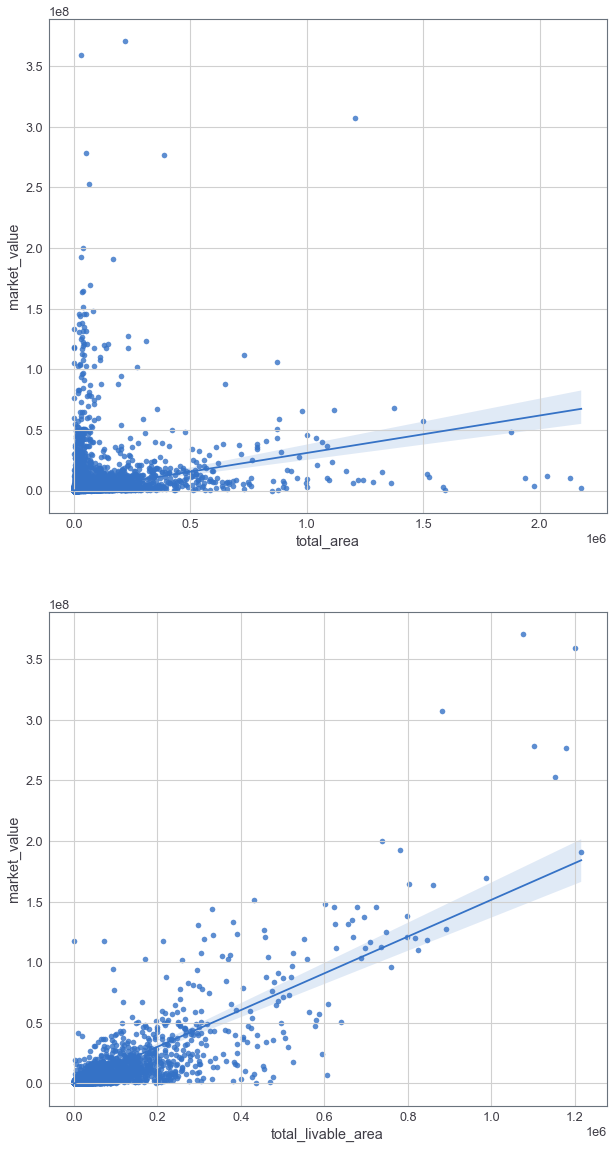

In [25]:
fig, ax = plt.subplots(2,1, figsize=(10,20))
for variable, subplot in zip(['total_area','total_livable_area'], ax.flatten()):
    sns.regplot(data=df, y='market_value', x=variable, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

From regplot above, we analyze there are some outliers in market_value. Those outliers value are above 150.000.000 while majority of the data occur below 500.000, so we can considered this value as very extreme outliers. Occurence of the values above 150.000.000 explain why the data has a right skew.

In [24]:
df[df['market_value']>150000000]

,building_code_description,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,interior_condition,location,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,other_building,parcel_number,parcel_shape,sale_date,sale_price,street_designation,topography,total_area,total_livable_area,unfinished,view_type,year_built,zip_code,zoning,new_zoning,sale_year,sale_year_group,parking_spaces,overall_condition,property_age
469466,APTS 100+ UNITS MASONRY,Multi Family,0,427.00,2.0,0,391.25,2.0,2201 PARK TOWNE PL,276892000.0,66.0,35.5,101.5,18.0,N,881030930,A,1996-09-30,2000000.0,PL,F,387684.00,1179072.0,F,I,1959.0,19130,RM4,Residential Multi Family,1996.0,2000-1996,0,2.0,61.0
469923,APTS 100+ UNITS MASONRY,Multi Family,0,396.00,2.0,0,98.00,2.0,1801 JOHN F KENNEDY BLVD,200287300.0,66.0,35.5,101.5,19.0,N,881035000,E,1995-11-30,1.0,BLV,F,38808.00,738207.0,F,I,1961.0,19103,CMX5,Mixed Used,1995.0,1995-1991,0,2.0,59.0
482011,AMUSE HALL MASONRY,Commercial,0,998.88,1.0,0,1500.59,1.0,1001-99 N DELAWARE AVE,307363100.0,1.0,0.0,6.0,2.0,N,882028210,B,2014-10-10,1.0,AVE,C,1206908.00,880949.0,F,I,2010.0,19125,SPENT,Special Purpose Entertainment,2014.0,2015-2011,1,1.0,10.0
489483,OFF BLD COM NO GAR MASON,Commercial,0,198.00,4.0,0,177.25,4.0,1600-22 MARKET ST,163646300.0,1.0,0.0,4.0,39.0,N,883031500,E,2018-02-07,160000000.0,ST,A,35095.50,859989.0,F,I,1982.0,19103,CMX5,Mixed Used,2018.0,2020-2016,0,4.0,38.0
490466,OFF BLD COM NO GAR MASON,Commercial,0,284.00,4.0,0,226.87,4.0,2001 MARKET ST,252703800.0,1.0,0.0,4.0,41.0,N,883054361,E,1997-01-30,1.0,ST,F,64431.00,1152480.0,F,I,1991.0,19103,CMX5,Mixed Used,1997.0,2000-1996,0,4.0,29.0
490651,OFF BLD N/COM W/PKG MASON,Commercial,0,1.00,3.0,0,30179.00,3.0,1701 JOHN F KENNEDY BLVD,358973100.0,4.0,0.0,4.0,58.0,N,883056605,E,2006-02-23,1.0,BLV,F,30179.00,1200021.0,F,I,2007.0,19103,CMX5,Mixed Used,2006.0,2010-2006,0,3.0,13.0
490652,OFF BLD COM NO GAR MASON,Commercial,0,157.00,1.0,0,396.00,1.0,1800 ARCH ST,278766900.0,1.0,0.0,4.0,44.0,N,883056805,A,2016-12-28,1.0,ST,F,51574.00,1103287.0,F,I,2016.0,19103,CMX5,Mixed Used,2016.0,2020-2016,1,1.0,4.0
490800,OFF BLD COM NO GAR MASON,Commercial,0,220.00,4.0,0,324.00,4.0,508-32 WALNUT ST,169697900.0,1.0,0.0,4.0,20.0,N,883006500,A,2016-06-22,114170000.0,ST,A,69998.00,986960.0,F,I,1918.0,19106,CMX4,Mixed Used,2016.0,2020-2016,0,4.0,102.0
490972,OFF BLD COM NO GAR MASON,Commercial,0,288.00,3.0,0,132.00,3.0,100-20 N 18TH ST,164954700.0,1.0,0.0,4.0,34.0,N,883061805,E,1996-06-18,1.0,ST,F,38016.00,803012.0,F,I,1985.0,19103,CMX5,Mixed Used,1996.0,2000-1996,0,3.0,35.0
490974,OFF BLD COM NO GAR MASON,Commercial,0,225.91,3.0,0,192.79,3.0,2929 ARCH ST,192376800.0,1.0,0.0,4.0,28.0,N,883062400,A,2013-10-17,23200000.0,ST,F,29633.00,782208.0,F,I,2005.0,19104,CMX5,Mixed Used,2013.0,2015-2011,1,3.0,15.0


In [25]:
index_out3=df[df['market_value']>150000000].index

In [26]:
df.drop(index=index_out3, axis=0, inplace=True)

In [27]:
df.reset_index(drop=True, inplace=True)

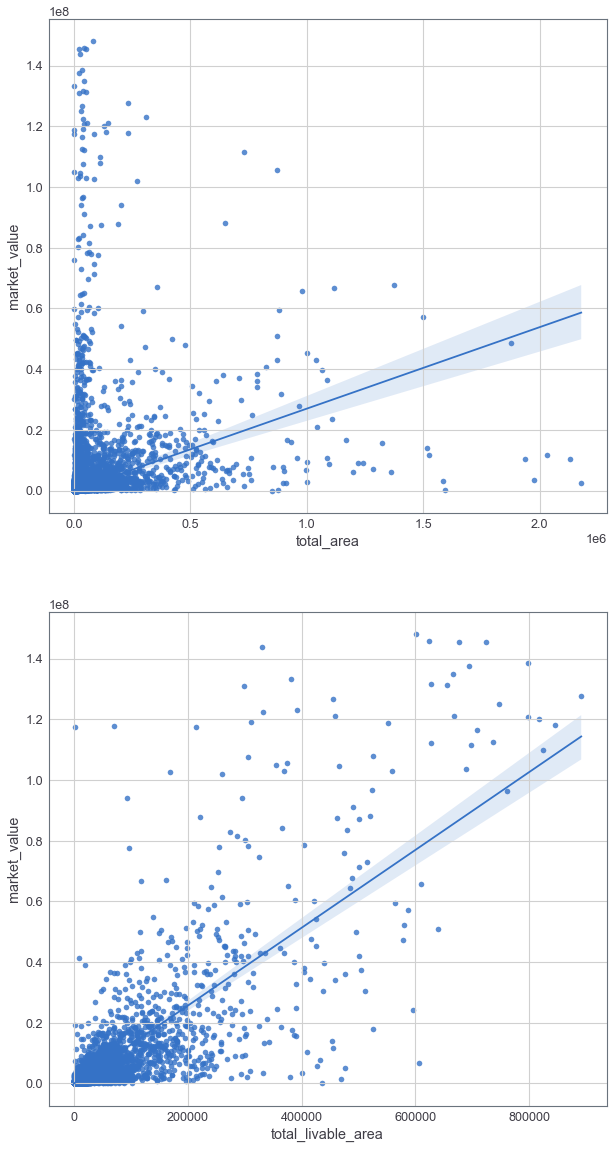

In [30]:
fig, ax = plt.subplots(2,1, figsize=(10,20))
for variable, subplot in zip(['total_area','total_livable_area'], ax.flatten()):
    sns.regplot(data=df, y='market_value', x=variable, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

After we drop the extreme outliers we can see clearly the distribution of the data, even tough there are many data which located outside majority of the data, we considered this as the natural behaviour of the data since this is a complex real world.

##### Total Area

After long discussion and consideration, we must revisit and find another hidden outlier that can be still exist in numerical data. In this part we try to combine numerical feature with categorical group, so we can track if there any hidden outliers.

In [28]:
# Check descriptive statistics of total area based on category code description
df.groupby('category_code_description')['total_area'].describe()

,count,mean,std,min,25%,50%,75%,max
category_code_description,,,,,,,,
Commercial,9148.0,24239.861761,94262.846501,1.0,2077.875,4950.00,14164.00,2178000.0
Industrial,2713.0,36655.440940,96451.625202,120.0,2688.160,7017.00,26064.30,1515510.0
Mixed Use,14257.0,1734.899198,2677.605685,192.0,1062.000,1337.50,1838.00,262183.9
Multi Family,42058.0,4623.117122,24658.050965,1.0,1345.410,1983.32,2992.00,1242766.8
Single Family,427156.0,2075.508695,5074.752963,1.0,931.000,1291.50,1972.30,1591700.0
Vacant Land,31.0,46756.094194,172364.396874,700.0,1265.135,1392.00,2968.75,911710.8


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


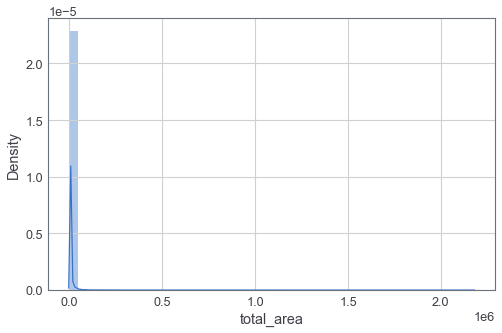

In [29]:
#plot total_area data distribution
plt.figure(figsize=(8,5))
sns.distplot(df['total_area'], kde=True)
plt.show()

From histogram total_area above, we can see the distribution of the data is not normal and also we cannot see the true distribution of the data. To fix this problem we can drop data above 100.000 feet (Extreme Q3 value), so we can get better data distribution. 

In [30]:
# Extreme Q3 Value
df[df['total_area']>100000]

,building_code_description,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,interior_condition,location,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,other_building,parcel_number,parcel_shape,sale_date,sale_price,street_designation,topography,total_area,total_livable_area,unfinished,view_type,year_built,zip_code,zoning,new_zoning,sale_year,sale_year_group,parking_spaces,overall_condition,property_age
37818,ROW 2 STY MASONRY,Single Family,0,62.00,5.0,0,13750.00,5.0,230 E INDIANA AVE,16600.0,1.0,3.0,6.0,2.0,N,71237500,E,2018-02-14,7000.0,AVE,F,852500.00,1080.0,F,I,1920.0,19134,RM1,Residential Multi Family,2018.0,2020-2016,0,5.0,100.0
46881,DET W/B GAR 2.5 STY STONE,Single Family,Y,440.37,3.0,1,228.59,3.0,8863 NORWOOD AVE,1464100.0,4.0,5.0,13.0,3.0,N,91221004,B,2009-12-17,1.0,AVE,B,110148.00,6270.0,F,C,1892.0,19118,RSD1,Residential Single Family,2009.0,2010-2006,3,3.0,128.0
46882,DET W/D GAR 2.5 STY STONE,Single Family,Y,325.00,4.0,1,53.50,4.0,8871 NORWOOD AVE,1033200.0,4.0,7.0,13.0,3.0,N,91221010,B,1995-08-25,350000.0,AVE,B,114125.00,5800.0,F,C,1896.0,19118,RSD1,Residential Single Family,1995.0,1995-1991,2,4.0,124.0
46920,DET W/B GAR 2 STY STONE,Single Family,N,188.35,4.0,>3,339.33,4.0,204 LYNNEBROOK LN,1017100.0,2.0,4.0,8.0,2.0,N,91136405,B,1983-12-22,1.0,LA,A,121968.00,6276.0,F,C,1925.0,19118,RSD1,Residential Single Family,1983.0,1985-1981,2,4.0,95.0
47028,DET W/D GAR 2 STY STONE,Single Family,N,462.26,4.0,>3,222.75,4.0,63 E BELLS MILL RD,964700.0,2.0,4.0,7.0,2.0,N,91141100,E,2015-06-05,750000.0,RD,F,102968.41,5594.0,F,C,1925.0,19118,RSD1,Residential Single Family,2015.0,2015-2011,2,4.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494322,APTS 51-100 UNITS MASONRY,Multi Family,0,342.22,3.0,0,462.35,3.0,507 MANHEIM ST,2336400.0,65.0,68.0,133.0,2.0,N,886603400,E,1998-11-16,450000.0,ST,F,158224.96,79488.0,F,I,1935.0,19144,RM2,Residential Multi Family,1998.0,2000-1996,1,3.0,85.0
494329,APTS 5-50 UNITS MASONRY,Multi Family,Y,498.00,2.0,0,396.00,2.0,1001-37 W GIRARD AVE,1888000.0,5.0,7.0,12.0,3.0,N,886667000,E,1966-03-21,1.0,AVE,F,197208.00,21900.0,F,I,1965.0,19123,RM2,Residential Multi Family,1966.0,1970-1966,1,2.0,55.0
494339,APTS 100+ UNITS MASONRY,Multi Family,0,396.00,6.0,0,1532.00,6.0,3232 HENRY AVE,2280000.0,66.0,35.5,101.5,1.0,N,886670500,E,2015-01-02,2100000.0,AVE,F,352109.00,304410.0,F,I,1950.0,19129,RSA5,Residential Single Family,2015.0,2015-2011,1,6.0,70.0
494493,APT BOARDING HOME MASONRY,Multi Family,0,443.03,2.0,0,365.00,2.0,118-60 E INDIANA AVE,1654600.0,2.0,28.0,30.0,2.0,N,886605650,B,1981-12-21,114200.0,AVE,F,123536.16,191781.0,F,0,1935.0,19134,IRMX,Mixed Used,1981.0,1985-1981,0,2.0,85.0


In [31]:
index_out4=df[df['total_area']>100000].index

In [32]:
len(df[df['total_area']>100000])/len((df['market_value']))*100
#Drop 0.016% from the data to remove extreme outliers for better data modelling quality

0.19642161404868752

In [33]:
df.drop(index=index_out4, axis=0, inplace=True)

In [34]:
df.reset_index(drop=True, inplace=True)

(array([2.8000e+01, 2.7100e+02, 2.4000e+02, 5.7100e+02, 1.8040e+03,
        6.7330e+03, 2.7446e+04, 3.3293e+04, 2.6757e+04, 4.0474e+04]),
 array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000]),
 <BarContainer object of 10 artists>)

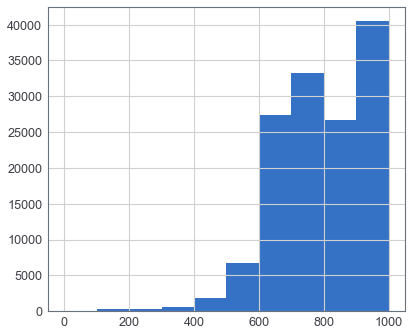

In [35]:
# Extreme Q1 value
# After we track outlier above Q3, now we try to track outlier below Q1
plt.hist(df['total_area'],bins=[0,100,200,300,400,500,600,700,800,900,1000])

There are extreme changing value of the total area from 600 to 500, so we can consider this as extreme Q1 outlier and we can drop this data for better data modelling quality.

In [36]:
df[df['total_area']<600]

,building_code_description,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,interior_condition,location,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,other_building,parcel_number,parcel_shape,sale_date,sale_price,street_designation,topography,total_area,total_livable_area,unfinished,view_type,year_built,zip_code,zoning,new_zoning,sale_year,sale_year_group,parking_spaces,overall_condition,property_age
11,ROW 2 STY MASONRY,Single Family,N,32.00,4.0,0,13.33,4.0,108 SEARS ST,155400.0,1.0,2.0,4.0,2.0,N,11003500,E,2015-09-22,90000.0,ST,F,426.56,572.0,F,I,1920.0,19147,RSA5,Residential Single Family,2015.0,2015-2011,0,4.0,100.0
26,ROW 2 STY MASONRY,Single Family,N,32.00,5.0,0,13.50,5.0,110 SEARS ST,124500.0,1.0,2.0,4.0,2.0,N,11003600,E,1991-12-17,1.0,ST,F,432.00,828.0,F,I,1920.0,19147,RSA5,Residential Single Family,1991.0,1995-1991,0,5.0,100.0
27,ROW 2 STY MASONRY,Single Family,N,32.00,4.0,0,14.00,4.0,112 SEARS ST,184700.0,1.0,2.0,4.0,2.0,N,11003700,E,1997-04-09,45000.0,ST,F,448.00,870.0,F,I,1920.0,19147,RSA5,Residential Single Family,1997.0,2000-1996,0,4.0,100.0
34,ROW 2 STY MASONRY,Single Family,Y,44.80,2.0,0,9.60,2.0,215 EARP ST,254900.0,1.0,2.0,4.0,2.0,N,11005100,E,2012-05-04,164000.0,ST,F,430.08,768.0,F,I,1920.0,19147,RSA5,Residential Single Family,2012.0,2015-2011,0,2.0,100.0
35,ROW 2 STY MASONRY,Single Family,N,49.62,4.0,0,12.00,4.0,217 EARP ST,180400.0,1.0,2.0,4.0,2.0,N,11005200,E,2016-03-25,410000.0,ST,F,595.44,936.0,F,I,1920.0,19147,RSA5,Residential Single Family,2016.0,2020-2016,0,4.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494296,CONDO PARKING SPACE,Single Family,0,162.00,4.0,0,1.00,4.0,4236 OSAGE AVE,17000.0,0.0,0.0,0.0,0.0,N,888270038,E,2006-05-06,27500.0,AVE,F,162.00,0.0,F,0,2006.0,19104,RM1,Residential Multi Family,2006.0,2010-2006,1,4.0,14.0
494297,CONDO PARKING SPACE,Single Family,0,162.00,4.0,0,1.00,4.0,4236 OSAGE AVE,17000.0,0.0,0.0,0.0,0.0,N,888270040,E,2005-10-31,335000.0,AVE,F,162.00,0.0,F,0,2006.0,19104,RM1,Residential Multi Family,2005.0,2005-2001,1,4.0,14.0
494298,CONDO PARKING SPACE,Single Family,0,162.00,4.0,0,1.00,4.0,4236 OSAGE AVE,17000.0,0.0,0.0,0.0,0.0,N,888270042,E,2005-10-13,410000.0,AVE,F,162.00,0.0,F,0,2006.0,19104,RM1,Residential Multi Family,2005.0,2005-2001,1,4.0,14.0
494299,CONDO PARKING SPACE,Single Family,0,162.00,4.0,0,1.00,4.0,4236 OSAGE AVE,17000.0,0.0,0.0,0.0,0.0,N,888270044,E,2018-06-27,460000.0,AVE,F,162.00,0.0,F,0,2006.0,19104,RM1,Residential Multi Family,2018.0,2020-2016,1,4.0,14.0


In [37]:
index_out5=df[df['total_area']<600].index

In [38]:
df.drop(index=index_out5, axis=0, inplace=True)

In [39]:
df.reset_index(drop=True, inplace=True)

Now we try to check data distribution of total_area after dropping extreme outlier Q1 and Q3 (transformed into log dist).

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 3.21 and sigma = 0.31



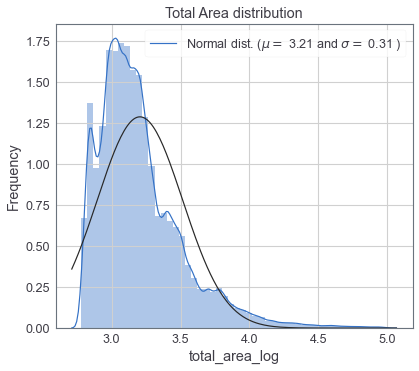

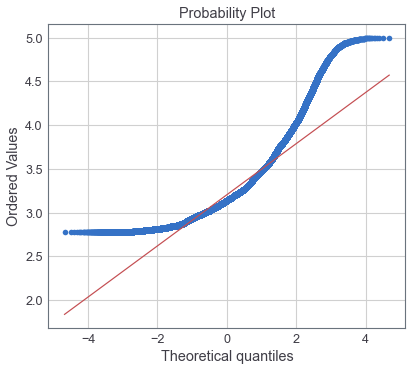

In [40]:
df["total_area_log"] = np.log10(df["total_area"])

#Check the new distribution 
sns.distplot(df['total_area_log'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['total_area_log'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Total Area distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['total_area_log'], plot=plt)
plt.show()

After drop extreme Q1 and Q3 outliers, now total area has a better data distribution.

##### Total Liveable Area

Check hidden outlier in numerical feature by grouping it with categorical feature.

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


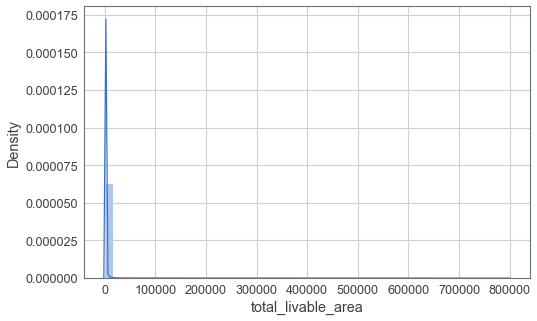

In [41]:
#plot total_livable_area data distribution
plt.figure(figsize=(8,5))
sns.distplot(df['total_livable_area'], kde=True)
plt.show()

In [42]:
df[df['total_livable_area']>100000][['frontage','depth','total_area','total_livable_area','number_stories']]

,frontage,depth,total_area,total_livable_area,number_stories
451005,396.00,246.79,97728.84,216875.0,5.0
451017,140.00,500.00,70000.00,170226.0,5.0
451090,116.00,90.00,10440.00,130439.0,1.0
451092,154.00,375.00,57750.00,126280.0,5.0
451165,232.47,169.10,39310.67,180624.0,5.0
...,...,...,...,...,...
483355,350.45,201.71,69696.34,134150.0,10.0
483505,140.65,169.00,22019.35,118014.0,5.0
483506,192.53,267.02,51409.82,145000.0,8.0
483654,227.56,165.00,25100.00,192373.0,9.0


In [43]:
#Extreme Q3 value
df.groupby('category_code_description')['total_livable_area'].describe()

,count,mean,std,min,25%,50%,75%,max
category_code_description,,,,,,,,
Commercial,8671.0,10972.339523,38050.657634,0.0,1914.5,3700.0,8491.0,798189.0
Industrial,2452.0,12055.780179,24329.722130,0.0,2160.0,4809.0,12630.0,526000.0
Mixed Use,14145.0,2588.610180,1370.109158,418.0,1740.0,2244.0,2985.0,20070.0
Multi Family,41731.0,4160.550454,16645.449733,478.0,1610.0,1968.0,2660.0,677140.0
Single Family,417716.0,1365.313552,540.400045,85.0,1080.0,1230.0,1486.0,40628.0
Vacant Land,28.0,496.178571,944.389909,0.0,0.0,0.0,609.5,3346.0


In [44]:
#Checking total_liveable_area above 750.000 since its value far from 75% (Q3) of the data and can be considered as extreme outlier
df[df['total_livable_area']>750000][['frontage','depth','total_area','total_livable_area','number_stories','building_code_description']]

,frontage,depth,total_area,total_livable_area,number_stories,building_code_description
481437,230.0,155.69,35808.0,760200.0,25.0,OFF BLD COM NO GAR MASON
481569,251.0,1348.00,33952.0,797220.0,36.0,OFF BLD N/PKG N/COM MASON
481570,396.0,108.00,42768.0,798189.0,20.0,OFF BLD COM NO GAR MASON


(array([5.5000e+01, 2.4000e+01, 7.3000e+01, 1.3400e+02, 1.6500e+02,
        2.3400e+02, 2.0340e+03, 7.9870e+03, 1.6448e+04, 3.5929e+04]),
 array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000]),
 <BarContainer object of 10 artists>)

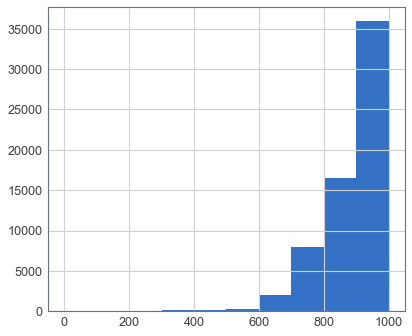

In [45]:
#Extreme Q1 value
# After we track outlier above Q3, now we try to track outlier below Q1
plt.hist(df['total_livable_area'],bins=[0,100,200,300,400,500,600,700,800,900,1000])

There are extreme changing value of the total area from 600 to 500, so we can consider this as extreme Q1 outlier and we can drop this data for better data modelling quality.

In [46]:
df[df['total_livable_area']<600]

,building_code_description,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,interior_condition,location,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,other_building,parcel_number,parcel_shape,sale_date,sale_price,street_designation,topography,total_area,total_livable_area,unfinished,view_type,year_built,zip_code,zoning,new_zoning,sale_year,sale_year_group,parking_spaces,overall_condition,property_age,total_area_log
365,PRIV GAR 1 STY MASONRY,Single Family,0,50.75,4.0,0,18.00,4.0,1308 S AMERICAN ST,75200.0,1.0,3.0,5.5,1.0,N,11078705,E,2010-05-10,1.0,ST,F,913.50,522.0,F,I,1930.0,19147,RSA5,Residential Single Family,2010.0,2010-2006,0,4.0,90.0,2.960709
668,PRIV GAR 1 STY MASONRY,Single Family,N,75.30,4.0,0,16.00,4.0,206 WATKINS ST,77300.0,1.0,3.0,5.0,1.0,N,11123810,E,2009-03-12,3.0,ST,F,1205.00,480.0,F,I,2008.0,19148,RSA5,Residential Single Family,2009.0,2010-2006,1,4.0,12.0,3.080987
1691,PRIV GAR 1 STY MASONRY,Single Family,0,50.00,4.0,0,14.00,4.0,523 PIERCE ST,94200.0,1.0,3.0,5.5,1.0,N,11380100,E,2003-10-09,1.0,ST,F,700.00,364.0,F,I,1916.0,19148,RSA5,Residential Single Family,2003.0,2005-2001,0,4.0,104.0,2.845098
3236,ROW W/GAR 1 STY MASONRY,Single Family,N,70.41,4.0,0,17.00,4.0,1815 S 8TH ST,158300.0,1.0,1.0,2.0,1.0,N,12192505,E,2020-02-25,330000.0,ST,F,1196.97,561.0,F,I,1960.0,19148,CMX1,Mixed Used,2020.0,2020-2016,2,4.0,60.0,3.078083
3809,ROW 2 STY MASONRY,Single Family,Y,56.00,3.0,0,11.66,3.0,644 SEARS ST,155600.0,1.0,2.0,4.0,2.0,N,12012200,E,2018-11-13,225000.0,ST,F,652.96,586.0,F,I,1915.0,19147,RSA5,Residential Single Family,2018.0,2020-2016,0,3.0,105.0,2.814887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484333,CONDO PARKING SPACE,Single Family,0,110.00,1.0,0,37.81,1.0,620 N 03RD ST,20000.0,0.0,0.0,0.0,4.0,N,888501332,E,2017-03-20,600000.0,ST,F,4159.43,153.0,F,0,2017.0,19123,RSA5,Residential Single Family,2017.0,2020-2016,1,1.0,3.0,3.619034
484334,CONDO PARKING SPACE,Single Family,N,110.00,1.0,0,37.81,1.0,620 N 03RD ST,20000.0,0.0,0.0,0.0,4.0,N,888501334,E,2019-05-31,350000.0,ST,F,4159.43,153.0,F,0,2017.0,19123,RSA5,Residential Single Family,2019.0,2020-2016,1,1.0,3.0,3.619034
484341,RES CONDO 4 STY MAS+OTH,Single Family,Y,59.00,2.0,0,25.60,2.0,2545 MONTROSE ST,223300.0,2.0,1.0,3.0,4.0,N,888305008,E,2015-09-08,1.0,ST,F,1510.40,588.0,F,I,2019.0,19146,RM1,Residential Multi Family,2015.0,2015-2011,1,2.0,1.0,3.179092
484345,RES CONDO 4 STY MAS+OTH,Single Family,Y,59.00,2.0,0,25.60,2.0,2549 MONTROSE ST,223300.0,2.0,1.0,3.0,4.0,N,888305016,E,2015-09-08,1.0,ST,F,1510.40,588.0,F,I,2019.0,19146,RM1,Residential Multi Family,2015.0,2015-2011,1,2.0,1.0,3.179092


In [47]:
index_out6=df[df['total_livable_area']<600].index

In [48]:
df.drop(index=index_out6, axis=0, inplace=True)

In [49]:
df.reset_index(drop=True, inplace=True)

Now we try to check data distribution of total_livable_area after dropping extreme outlier Q1 and Q3 (transformed into log dist).

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 1869.61 and sigma = 7471.05



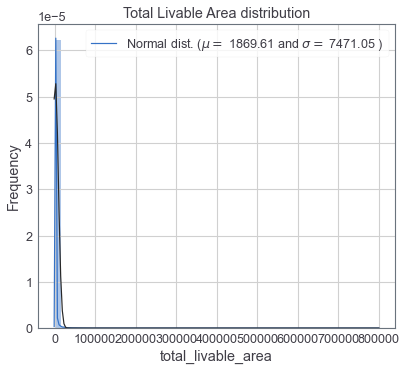

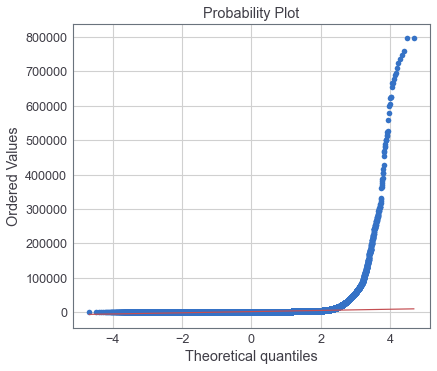

In [50]:
#Check the new distribution 
sns.distplot(df['total_livable_area'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['total_livable_area'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Total Livable Area distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['total_livable_area'], plot=plt)
plt.show()

In [51]:
df["total_livable_area_log"] = np.log10(df["total_livable_area"])

In [52]:
df['total_livable_area_log'].describe()

count    484058.000000
mean          3.155573
std           0.202778
min           2.778151
25%           3.044148
50%           3.110590
75%           3.217484
max           5.902106
Name: total_livable_area_log, dtype: float64

In [53]:
index=df[df['total_livable_area_log']==np.NINF].index
df.loc[index,'total_livable_area_log']=0

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 3.16 and sigma = 0.20



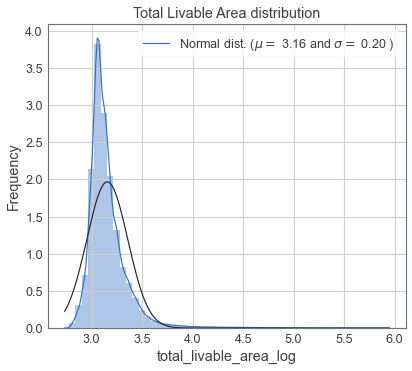

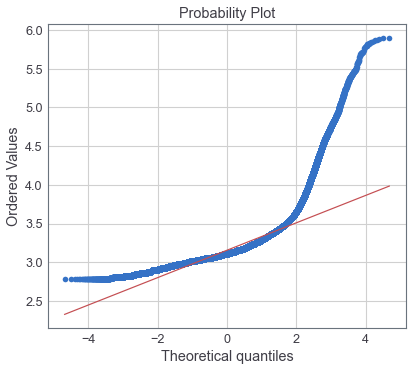

In [54]:
#Check the new distribution 
sns.distplot(df['total_livable_area_log'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['total_livable_area_log'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Total Livable Area distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['total_livable_area_log'], plot=plt)
plt.show()

In [56]:
df.reset_index(drop=True, inplace=True)

From histogram total_livable_area above, we can see the distribution of the data is normal altough we don't drop any data. So we already clear to clean data from numerical outliers.

Numerical features after feature selection based on EDA and outlier analysis:
1. number_of_rooms
2. number_stories
3. overall_condition
4. property_age
5. sale_year
6. total_area
7. total_livable_area

# Feature Engineering

## Distance from Zip Code

In [56]:
df['zip_code']=df['zip_code'].apply(lambda x: int(x))

In [57]:
df['distance_city_center']=df['zip_code'].apply(lambda x: 
                                                'City Center' if x in ([19103,19102,19107,19106,19130,19123,19146,19147]) else
                                                'Adjacent City Center' if x in([19121, 19122, 19125, 19145, 19148, 19104]) else
                                                'Near City Center' if x in([19112, 19153, 19142, 19143, 19139, 19151, 19131, 19132, 19133, 19134]) else
                                                'Far From City Center' if x in([19129, 19140, 19124, 19137, 19144, 19141, 19120, 19135, 19149]) else
                                                'Very Far From City Center NW' if x in([19128, 19118, 19119, 19150, 19138, 19126, 19127]) else
                                                'Very Far From City Center NE' if x in([19111, 19152, 19136, 19115, 19114, 19116, 19154]) else 'Other')

In [58]:
df['distance_city_center'].value_counts()

Near City Center                122681
Far From City Center            119180
Very Far From City Center NE     75442
Adjacent City Center             72383
Very Far From City Center NW     52398
City Center                      41970
Other                                4
Name: distance_city_center, dtype: int64

In [59]:
formap=df.groupby('distance_city_center')[['market_value','property_age','total_livable_area','overall_condition']].median().reset_index()

In [60]:
formap['distance_city_center'].unique()

array(['Adjacent City Center', 'City Center', 'Far From City Center',
       'Near City Center', 'Other', 'Very Far From City Center NE',
       'Very Far From City Center NW'], dtype=object)

In [61]:
count=df['distance_city_center'].value_counts().reset_index()
count.rename(columns={'distance_city_center':'count'}, inplace=True)
count.rename(columns={'index':'distance_city_center'}, inplace=True)
count

,distance_city_center,count
0,Near City Center,122681
1,Far From City Center,119180
2,Very Far From City Center NE,75442
3,Adjacent City Center,72383
4,Very Far From City Center NW,52398
5,City Center,41970
6,Other,4


In [62]:
formap=formap.merge(count, on='distance_city_center')
formap

,distance_city_center,market_value,property_age,total_livable_area,overall_condition,count
0,Adjacent City Center,176100.0,100.0,1246.0,4.0,72383
1,City Center,397850.0,100.0,1694.0,4.0,41970
2,Far From City Center,102100.0,82.0,1230.0,4.0,119180
3,Near City Center,68600.0,95.0,1208.0,4.0,122681
4,Other,32399700.0,52.0,242774.0,2.5,4
5,Very Far From City Center NE,206000.0,60.0,1360.0,4.0,75442
6,Very Far From City Center NW,174000.0,95.0,1400.0,4.0,52398


In [63]:
phil_by_zipcode=json.load(open('Zipcodes_Poly.geojson'))
phil_by_zipcode['features'][0]['geometry']['coordinates']

[[[-75.1110653346439, 40.0468227016961],
  [-75.1094338408832, 40.0458834049658],
  [-75.1092665910645, 40.0457871118939],
  [-75.1089076424268, 40.0461364171465],
  [-75.1090472451382, 40.0462188966551],
  [-75.1081054819242, 40.0471759196109],
  [-75.1082140890639, 40.0472393936405],
  [-75.1074295041131, 40.0480308153177],
  [-75.1076470759475, 40.0481486263741],
  [-75.1074929449898, 40.0483371581054],
  [-75.1068930104058, 40.0488267438584],
  [-75.1066723855388, 40.048702530507],
  [-75.1062215143984, 40.0484534566616],
  [-75.1056182856026, 40.0481162112071],
  [-75.1051137333168, 40.0478140706917],
  [-75.1048930526283, 40.0476490501884],
  [-75.1047374387325, 40.0474752837513],
  [-75.1046704727332, 40.047394322985],
  [-75.1047370863951, 40.0471839650489],
  [-75.1046155613203, 40.0471046185527],
  [-75.1045075144828, 40.0470303505777],
  [-75.104358283243, 40.0468822585757],
  [-75.1040789454085, 40.0467250633476],
  [-75.1020844906496, 40.0457378005124],
  [-75.101707152583

In [64]:
formap['geometry']=None
formap

,distance_city_center,market_value,property_age,total_livable_area,overall_condition,count,geometry
0,Adjacent City Center,176100.0,100.0,1246.0,4.0,72383,None
1,City Center,397850.0,100.0,1694.0,4.0,41970,None
2,Far From City Center,102100.0,82.0,1230.0,4.0,119180,None
3,Near City Center,68600.0,95.0,1208.0,4.0,122681,None
4,Other,32399700.0,52.0,242774.0,2.5,4,None
5,Very Far From City Center NE,206000.0,60.0,1360.0,4.0,75442,None
6,Very Far From City Center NW,174000.0,95.0,1400.0,4.0,52398,None


In [65]:
distance=[]
for i in range(len(phil_by_zipcode['features'])):
    distance.append(phil_by_zipcode['features'][i]['properties']['CODE'])
distance=pd.DataFrame({'distance':distance})

In [66]:
distance

,distance
0,19120
1,19121
2,19122
3,19123
4,19124
5,19125
6,19126
7,19127
8,19128
9,19102


## Simplify Fireplaces

In [67]:
df['have_fireplaces']=df['fireplaces'].apply(lambda x: 0 if x=='0' else 1)

In [68]:
df['have_fireplaces'].value_counts()

0    470774
1     13284
Name: have_fireplaces, dtype: int64

## Extracting

In [69]:
pd.set_option('display.max_rows', 238)
kata_count=pd.read_csv('kata_count.csv',low_memory=False)
kata_count

,kata,Single Family,Multi Family,Mixed Use,Commercial,Industrial,Vacant Land
0,STY,459255.0,37285.0,14396.0,7338.0,4.0,0.0
1,MASONRY,406210.0,5209.0,6867.0,9622.0,3967.0,0.0
2,ROW,332571.0,16174.0,7051.0,0.0,0.0,0.0
3,GAR,177098.0,0.0,0.0,369.0,0.0,0.0
4,B,145703.0,0.0,797.0,0.0,0.0,0.0
5,W,66423.0,0.0,6303.0,814.0,0.0,0.0
6,DET,56922.0,1008.0,218.0,0.0,0.0,0.0
7,D,51978.0,5318.0,440.0,0.0,0.0,0.0
8,S,38755.0,5318.0,440.0,5.0,0.0,0.0
9,CONDO,34656.0,0.0,0.0,933.0,101.0,0.0


Building Code Description will define to 4 category
1. House
2. Condominium
3. Apartment
4. Other (the rest)

In [70]:
#list word in building_code_description that can describe everything other than house
list1=['CONDO','PARKING','SPACE','LOFT','MISC','APT','HOTEL','MOTEL','OFF','STR','STORE','WORSHIP','AUTO','PKG','BLD','SCHOOL',
 'REST','BAR','CARE','HEALTH','PARK','AMUSE','VACANT','TAVERN','CLEANING','CEMETERY','WAREHOUSE','MFG','JUNKYARD','VACANT']

In [71]:
df[(df['building_code_description'].str.contains('APT'))|(df['building_code_description'].str.contains('CONDO'))]['category_code_description'].value_counts()
#Commercial -> condominium
#Mixed use -> STR+APT

Multi Family     41670
Mixed Use         6564
Single Family      642
Commercial         134
Name: category_code_description, dtype: int64

### Condominium Column

In [72]:
df[((df['building_code_description'].str.contains('CONDO')))&(~df['building_code_description'].str.contains('PARKING'))].index

Int64Index([450310, 470395, 470445, 470581, 470582, 470652, 470653, 470654,
            470655, 471042,
            ...
            484048, 484049, 484050, 484051, 484052, 484053, 484054, 484055,
            484056, 484057],
           dtype='int64', length=776)

In [73]:
df['condominium']=df['building_code_description'].apply(lambda x: 1 if (('CONDO' in x)&('PARKING' not in x)) else 0)

In [74]:
df['condominium']

0         0
1         0
2         0
3         0
4         0
         ..
484053    1
484054    1
484055    1
484056    1
484057    1
Name: condominium, Length: 484058, dtype: int64

In [75]:
df['condominium'].sum()

776

### Apartment Column

In [76]:
df[((df['building_code_description'].str.contains('APT')))].index

Int64Index([    68,     77,    127,    197,    265,    272,    279,    280,
               281,    297,
            ...
            483394, 483395, 483396, 483397, 483404, 483405, 483406, 483407,
            483408, 483409],
           dtype='int64', length=48234)

In [77]:
df['apartment']=df['building_code_description'].apply(lambda x: 1 if ('APT' in x) else 0)

In [78]:
df['apartment']

0         0
1         0
2         0
3         0
4         0
         ..
484053    0
484054    0
484055    0
484056    0
484057    0
Name: apartment, Length: 484058, dtype: int64

In [79]:
df['apartment'].sum()

48234

### House

In [80]:
df[~df['building_code_description'].str.contains('|'.join(list1))].index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            483385, 483386, 483387, 483390, 483398, 483399, 483400, 483401,
            483402, 483403],
           dtype='int64', length=416567)

In [81]:
house_index=df[~df['building_code_description'].str.contains('|'.join(list1))].index

In [82]:
df['house']=[0] * len(df)

In [83]:
len(df['house'])

484058

In [84]:
df.loc[house_index,'house']=1

In [85]:
df['house'].sum()

416567

### Others

In [86]:
df[(df['building_code_description'].str.contains('|'.join(list1)))&(~df['building_code_description'].str.contains('APT'))&~((df['building_code_description'].str.contains('CONDO'))&(~df['building_code_description'].str.contains('PARKING')))].index

Int64Index([  2518,   3501,  11782,  13354,  13496,  14384,  15248,  15312,
             15358,  15514,
            ...
            482689, 482844, 482913, 482914, 482931, 483164, 483167, 483175,
            483243, 483333],
           dtype='int64', length=18481)

In [87]:
other_index=df[(df['building_code_description'].str.contains('|'.join(list1)))&
               (~df['building_code_description'].str.contains('APT'))&
               ~((df['building_code_description'].str.contains('CONDO'))&
                 (~df['building_code_description'].str.contains('PARKING')))].index

In [88]:
df['other']=[0] * len(df)

In [89]:
len(df['other'])

484058

In [90]:
df.loc[other_index,'other']=1

In [91]:
df['other'].sum()

18481

In [92]:
(df['apartment']+df['condominium']+df['house']+df['other']).sum()

484058

In [93]:
((df['apartment']+df['condominium']+df['house']+df['other'])!=1).sum()

0

In [94]:
df.drop(columns='other',inplace=True)

The Other column is drop, since apartment,condominium, and house column already have picture about it

### New Building Description
It will be use on Final Feature and will be drop after that

In [95]:
a=[]
for i in range(len(df)):
    if df['condominium'].loc[i]==1:
        a.append('Condominium')
    elif df['apartment'].loc[i]==1:
        a.append('Apartment')
    elif df['house'].loc[i]==1:
        a.append('House')
    else:
        a.append('Other')

In [96]:
len(a)

484058

In [97]:
df['new_building_desc']=a

### Drop Building_code_description

In [98]:
#it's already represent by Condominium, Apartment, and House column
df.drop(columns='building_code_description',inplace=True)

## Final Feature

After feature selection process this is the final data that we use for modelling process.

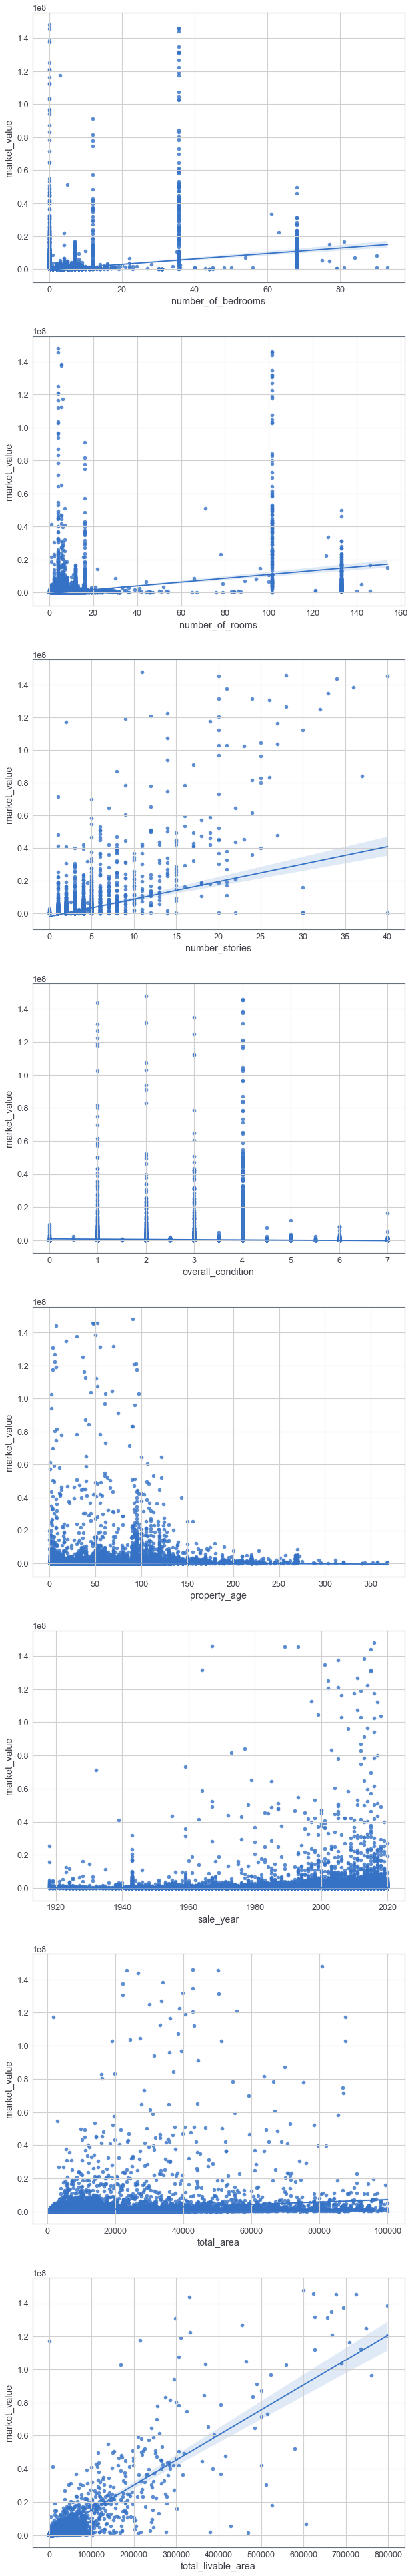

In [95]:
fig, ax = plt.subplots(8,1, figsize=(10,70))
for variable, subplot in zip(['number_of_bedrooms','number_of_rooms','number_stories','overall_condition','property_age',
                              'sale_year','total_area','total_livable_area'], ax.flatten()):
    sns.regplot(data=df, y='market_value', x=variable, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

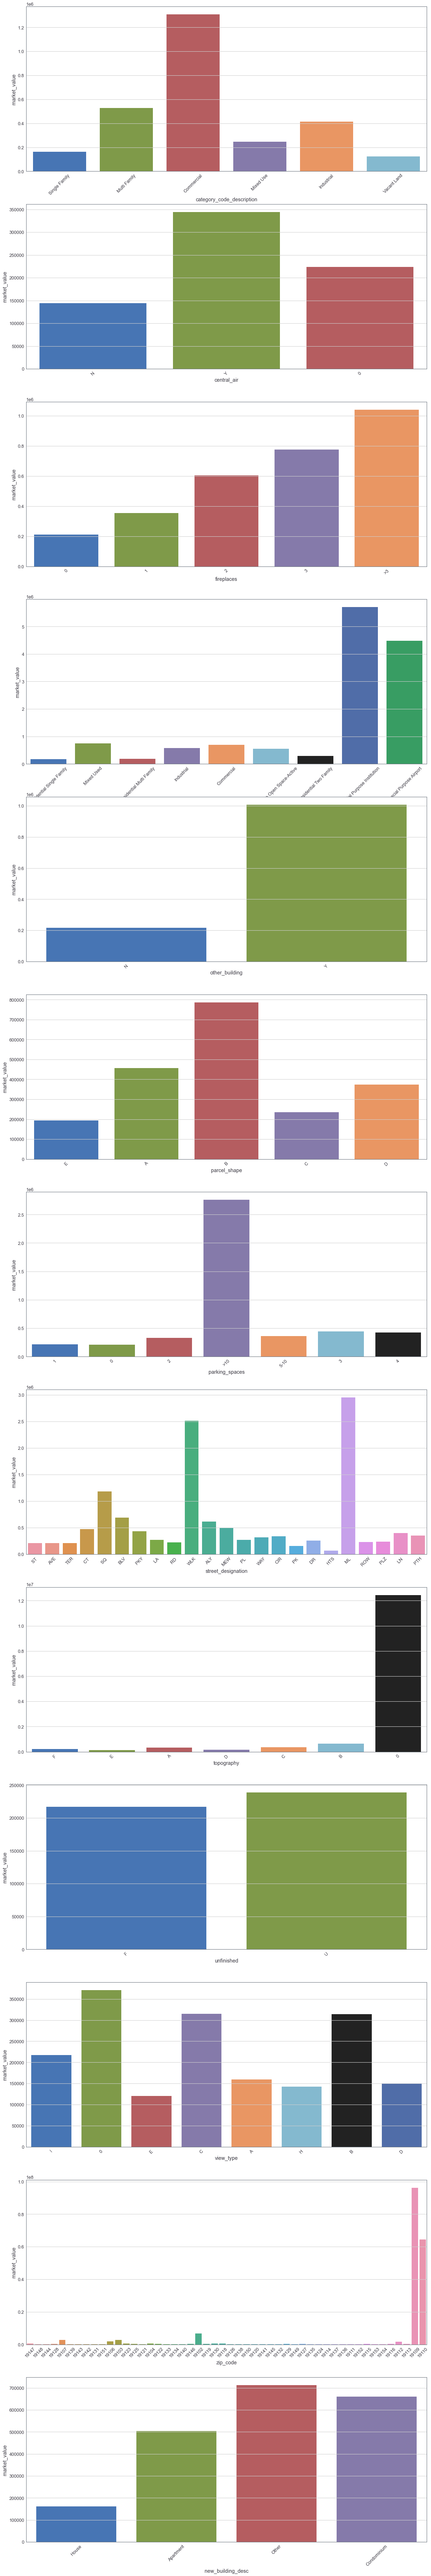

In [96]:
#New building description is use here (it's just for plot purposes)
fig, ax = plt.subplots(13,1, figsize=(20,130))
for variable, subplot in zip(['category_code_description','central_air',
                              'fireplaces','new_zoning','other_building','parcel_shape','parking_spaces',
                              'street_designation','topography','unfinished','view_type','zip_code','new_building_desc'], ax.flatten(), ):
    sns.barplot(data=df,x=variable,y='market_value', ax=subplot,ci=None)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

In [97]:
df.drop(columns='new_building_desc',inplace=True)

# Data Pre-Processing

As already mention in the background before, the position that we choose is as an agent property. As a property agent we try to cut operation cost, one of the cost we try to reduce is cost from hiring some estimator property professional. In order to achieve that, we will make a automated machine prediction for estimating property price. Machine learning algorithm that we use in this case is regression model algorithm since the target is numerical type. 

After cleansing the data, analyze data using EDA and oulier anlysis, finally we have 21 columns and 484.743 rows data for modelling purposes.

- **Label**: `market_value`


- **Feature**:
- **(Numerical)**
1. number_of_bedrooms
2. number_of_rooms
3. number_stories
4. overall_condition
5. property_age
6. sale_year
7. total_area
8. total_livable_area
- **(Categorical)**
9. category_code_description
10. central_air
11. distance_city_center
12. have_fireplaces
13. new_zoning
14. other_building
15. parcel_shape
16. parking_spaces
17. street_designation
18. topography
19. unfinished
20. view_type 
21. house
22. apartment
23. other

In [283]:
df_model=df[['number_of_bedrooms','number_of_rooms','number_stories','overall_condition','property_age','sale_year',
             'total_area','total_livable_area','category_code_description','central_air',
             'have_fireplaces','new_zoning','other_building','parcel_shape','parking_spaces','street_designation','topography',
             'unfinished','view_type','distance_city_center','condominium', 'apartment','house','zip_code']]
df_model

,number_of_bedrooms,number_of_rooms,number_stories,overall_condition,property_age,sale_year,total_area,total_livable_area,category_code_description,central_air,have_fireplaces,new_zoning,other_building,parcel_shape,parking_spaces,street_designation,topography,unfinished,view_type,distance_city_center,condominium,apartment,house,zip_code
0,4.0,7.0,3.0,5.0,100.0,1951.0,779.0,1650.0,Single Family,N,0,Residential Single Family,N,E,1,ST,F,F,I,City Center,0,0,1,19147
1,3.0,4.0,3.0,2.0,100.0,2017.0,779.1,1203.0,Single Family,Y,0,Residential Single Family,N,E,0,ST,F,F,I,City Center,0,0,1,19147
2,4.0,5.0,2.0,4.0,100.0,1975.0,725.2,1482.0,Single Family,N,0,Residential Single Family,N,E,0,ST,F,F,I,City Center,0,0,1,19147
3,4.0,8.0,2.0,4.0,100.0,2012.0,1433.0,2049.0,Single Family,Y,0,Residential Single Family,N,E,0,ST,F,F,I,City Center,0,0,1,19147
4,4.0,6.0,3.0,4.0,100.0,2017.0,1500.0,1155.0,Single Family,N,0,Residential Single Family,N,E,0,ST,F,F,I,City Center,0,0,1,19147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484053,3.0,6.0,3.0,1.0,5.0,2015.0,1041.6,1854.0,Single Family,Y,0,Residential Single Family,N,E,1,ST,F,F,I,Adjacent City Center,1,0,0,19122
484054,3.0,5.0,3.0,1.0,5.0,2015.0,1041.6,1571.0,Single Family,Y,0,Residential Single Family,N,E,1,ST,F,F,I,Adjacent City Center,1,0,0,19122
484055,2.0,4.0,3.0,1.0,5.0,2015.0,810.0,1041.0,Single Family,Y,0,Residential Single Family,N,E,1,ST,F,F,I,Adjacent City Center,1,0,0,19122
484056,2.0,4.0,3.0,1.0,5.0,2018.0,810.0,1134.0,Single Family,Y,0,Residential Single Family,N,E,1,ST,F,F,I,Adjacent City Center,1,0,0,19122


## Data Transformer (Encoding, Scaling)

**`Pre-Processing Scheme`**

Label: `market_value`

**Features:  
Categorical:**  
**`Binary encoding`**
1. category_code_description; 6 unique value
2. fireplaces; 5 unique value
3. new_zoning; 11 unique value
4. parcel_shape; 5 unique value
5. parking_spaces; 7 unique value
6. street_designation; 23 unique value
7. topography; 7 unique value
8. view_type; 8 unique value
9. zip_code; 52 unique value

**`One hot encoding`**
1. central_air; 3 unique value
2. other_building; 2 unique value
3. unfinished; 2 unique value

**Numeric:**  
**`Scaling`**:
1. total_area
2. total_livable_area
3. property_age

**`Do not preprocesed:`**
1. number_of_bedrooms
2. number_of_rooms
2. number_stories 
3. overall_condition
4. sale_year
5. house
6. apartment
7. condomium

In [142]:
transformer= ColumnTransformer([
    ('one hot', OneHotEncoder(drop='first'),['central_air','have_fireplaces','other_building','unfinished']),
    ('binary', ce.BinaryEncoder(),['category_code_description','distance_city_center','new_zoning','parcel_shape',
                                   'parking_spaces','street_designation','topography','view_type','zip_code']),
    ('scaling', RobustScaler(),['total_area','total_livable_area','property_age'])
], remainder='passthrough')

In [143]:
transformer.fit_transform(df_model)

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

## Data Splitting

In [144]:
y=df['market_value']
x=df_model

In [145]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2020)

## Pipeline Function

In [146]:
#For this modelling we choose these three model for cross-validation (model-benchmarking)
linreg=LinearRegression()
forest=RandomForestRegressor(random_state=2020)
xgb=XGBRegressor(random_state=2020)

In [147]:
linreg_pipe=Pipeline([
    ('preprocessing',transformer),
    ('model',linreg)
])
forest_pipe=Pipeline([
    ('preprocessing',transformer),
    ('model',forest)
])
xgb_pipe=Pipeline([
    ('preprocessing',transformer),
    ('model',xgb)
])

# Cross Validation (Model Benchmarking)

In regression model there are more than one evaluation metric that we can use to evaluate our model, those are:
1. R-squared
2. Mean squared error (MSE)
3. Root mean squared error (RMSE)
4. Mean absolute error (MAE)
5. Mean absolute percentage error (MAPE)

Selection process of evaluation method must be adjust with the business problem that we try to solve. In this case where market_value (numerical value) is the target, so we need evaulation metric which can provide exact error value and don't forget that market_value cannot be in negative value (always positive). So we choose mean absolute error (MAE) and mean absolute percentage error (MAPE) as metric evaluation. There is another consideration to choose evaluation metric, we need to know range value of the target. In this modelling data, market_value has a wide range value start from 5.500 to 1.500.000, to avoid bias in evaluation metric/error so we choose `mean absolute error (MAE)` as main evaluation metric, because this metric can well adjust with those wide range target value and dont stick to fixed error value.

In [148]:
models=[linreg_pipe,forest_pipe,xgb_pipe]
score=[]
mean_score=[]
std_score=[]

for i in models:
    model_cv=cross_val_score(i,x_train,y_train,scoring='neg_mean_absolute_percentage_error', cv=5, n_jobs=-1)
    score.append(model_cv)
    mean_score.append(model_cv.mean())
    std_score.append(model_cv.std())

pd.DataFrame({
    'model': ['LinReg','Forest','XGB'],
    'mean': mean_score,
    'std': std_score
})

,model,mean,std
0,LinReg,-0.906468,0.029465
1,Forest,-0.133209,0.003265
2,XGB,-0.275069,0.001754


From cross validation above, we can see mean absolute percentage error (MAPE) of the Random Forest model has the lowest error score (14.47%) and the most stable (lowest standard deviation) from all models. This means the algorithm can reduce error so well, so for this model we choose `Random Forest Regressor` as selected base algorithm model.

# Random Forest Model Performance

In [149]:
jtplot.style(theme='monokai')

## Modelling Data

In [150]:
forest_pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['central_air',
                                                   'have_fireplaces',
                                                   'other_building',
                                                   'unfinished']),
                                                 ('binary', BinaryEncoder(),
                                                  ['category_code_description',
                                                   'distance_city_center',
                                                   'new_zoning', 'parcel_shape',
                                                   'parking_spaces',
                                                   'street_designation',
                                       

In [151]:
y_pred_forest=forest_pipe.predict(x_test)

In [217]:
forest_result=pd.DataFrame({'Actual':y_test, 'Prediction': y_pred_forest})
forest_result

,Actual,Prediction
126008,58600.0,55798.0
398449,108000.0,108000.0
400948,115800.0,116680.0
302217,96900.0,96849.0
92255,294700.0,296724.0
...,...,...
428358,172200.0,175708.0
299672,56900.0,67416.0
57670,30200.0,30269.0
352945,145200.0,144995.0


In [218]:
forest_result['MAPE']=abs(forest_result['Prediction']-forest_result['Actual'])/forest_result['Actual']*100

## Model Result Analysis

In [219]:
print("MAPE SCORE: ",mean_absolute_percentage_error(y_test,y_pred_forest))
print("MAE SCORE: ",mean_absolute_error(y_test,y_pred_forest))
print("MSE SCORE: ",mean_squared_error(y_test,y_pred_forest))
print("RMSE SCORE: ",np.sqrt(mean_squared_error(y_test,y_pred_forest)))
print ("R2 SCORE: ", r2_score(y_test,y_pred_forest))

MAPE SCORE:  0.12255710383575225
MAE SCORE:  32380.079172474398
MSE SCORE:  149194029999.23434
RMSE SCORE:  386256.4303661938
R2 SCORE:  0.8927758053479059


From this [reference](https://onlinelibrary.wiley.com/doi/pdf/10.1002/9781119199885.app1) we know that if the MAPE score is under 20% than it can be categorized as good and if it below 10% than it can be categorized as excellent. Our MAPE score show that the percentage of error is around 13,35% which mean our model has a good accuracy. 

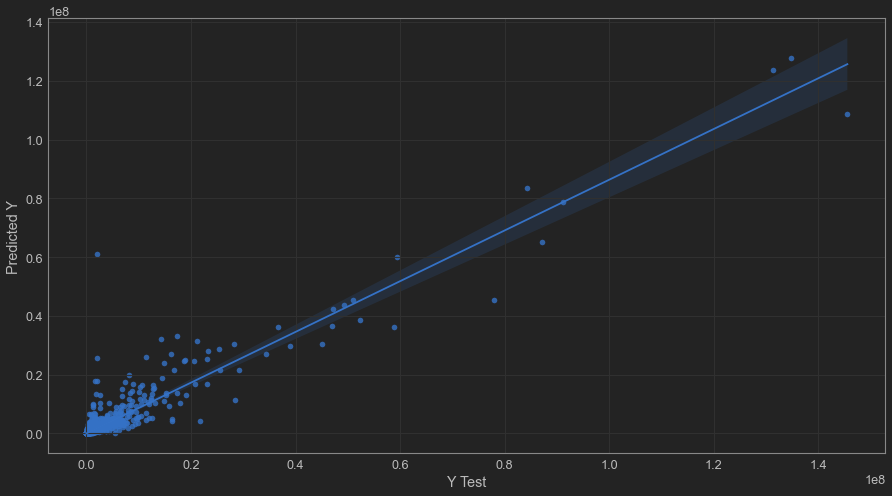

In [220]:
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred_forest,fit_reg=True)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.savefig('model2.jpg')
plt.show()

The plot above show us that most of the prediction is accurate or just have a small difference with the real value.  

But we must notes this model can only be use for below criteria:
1. 600< total_area <100.000
2. 600< total_livable_area <100.000
3. market_value< 150.000.000

From plot between Y-Test and Predicted-Y above, we can see there are some outlier values. We analyze this data as outliers:
1. Value of Predicted Y above 40.000.000
2. Value of Y Test above 40.000.000           
This data need to be analyze further.

In [221]:
forest_result[(forest_result['Actual']>40000000) | (forest_result['Prediction']>40000000)]

,Actual,Prediction,MAPE
480573,145580700.0,1.086178e+08,25.389958
474606,77911700.0,4.534030e+07,41.805527
480335,2068000.0,6.113153e+07,2856.069923
480443,46893800.0,3.646397e+07,22.241390
474796,52272400.0,3.845760e+07,26.428477
458036,91136500.0,7.891859e+07,13.406170
478858,87075100.0,6.502379e+07,25.324473
458445,131371200.0,1.238639e+08,5.714546
458759,58919400.0,3.631262e+07,38.368996
458426,59483600.0,6.009683e+07,1.030918


In [222]:
#Outlier index
index_model=forest_result[(forest_result['Actual']>40000000) | (forest_result['Prediction']>40000000)].index

In [223]:
#We try to analyze these outlier based on top of the feature importance
A=df.loc[index_model,['condominium','apartment','house','total_livable_area','number_stories','zip_code','property_age',
                      'total_area','overall_condition','number_of_rooms','market_value']].sort_values(by='market_value', ascending=False)
A

,condominium,apartment,house,total_livable_area,number_stories,zip_code,property_age,total_area,overall_condition,number_of_rooms,market_value
480573,0,0,0,723777.0,20.0,19107,47.0,50160.00,4.0,4.0,145580700.0
472482,0,1,0,665742.0,33.0,19106,18.0,42814.00,3.0,101.5,134863000.0
458445,0,1,0,655699.0,20.0,19103,55.0,50384.00,4.0,101.5,131371200.0
458036,0,1,0,489553.0,17.0,19104,75.0,44325.00,2.0,16.0,91136500.0
478858,0,0,0,500000.0,8.0,19103,39.0,69696.00,4.0,4.0,87075100.0
458602,0,1,0,364898.0,37.0,19103,43.0,36988.15,4.0,101.5,84244900.0
474606,0,1,0,254947.0,12.0,19121,13.0,75315.00,4.0,16.0,77911700.0
458426,0,1,0,210222.0,16.0,19106,5.0,55029.00,1.0,101.5,59483600.0
458759,0,1,0,245943.0,19.0,19147,40.0,30970.00,4.0,101.5,58919400.0
474796,0,1,0,225740.0,14.0,19107,122.0,19254.00,2.0,101.5,52272400.0


In [224]:
forest_result.sort_values(by='Actual', ascending=False).join(A, how='inner').reset_index(drop=True)

,Actual,Prediction,MAPE,condominium,apartment,house,total_livable_area,number_stories,zip_code,property_age,total_area,overall_condition,number_of_rooms,market_value
0,145580700.0,1.086178e+08,25.389958,0,0,0,723777.0,20.0,19107,47.0,50160.00,4.0,4.0,145580700.0
1,134863000.0,1.276654e+08,5.336996,0,1,0,665742.0,33.0,19106,18.0,42814.00,3.0,101.5,134863000.0
2,131371200.0,1.238639e+08,5.714546,0,1,0,655699.0,20.0,19103,55.0,50384.00,4.0,101.5,131371200.0
3,91136500.0,7.891859e+07,13.406170,0,1,0,489553.0,17.0,19104,75.0,44325.00,2.0,16.0,91136500.0
4,87075100.0,6.502379e+07,25.324473,0,0,0,500000.0,8.0,19103,39.0,69696.00,4.0,4.0,87075100.0
5,84244900.0,8.365968e+07,0.694659,0,1,0,364898.0,37.0,19103,43.0,36988.15,4.0,101.5,84244900.0
6,77911700.0,4.534030e+07,41.805527,0,1,0,254947.0,12.0,19121,13.0,75315.00,4.0,16.0,77911700.0
7,59483600.0,6.009683e+07,1.030918,0,1,0,210222.0,16.0,19106,5.0,55029.00,1.0,101.5,59483600.0
8,58919400.0,3.631262e+07,38.368996,0,1,0,245943.0,19.0,19147,40.0,30970.00,4.0,101.5,58919400.0
9,52272400.0,3.845760e+07,26.428477,0,1,0,225740.0,14.0,19107,122.0,19254.00,2.0,101.5,52272400.0


In [225]:
A.join(forest_result).sort_values(by='total_livable_area', ascending=False)

,condominium,apartment,house,total_livable_area,number_stories,zip_code,property_age,total_area,overall_condition,number_of_rooms,market_value,Actual,Prediction,MAPE
480573,0,0,0,723777.0,20.0,19107,47.0,50160.00,4.0,4.0,145580700.0,145580700.0,1.086178e+08,25.389958
472482,0,1,0,665742.0,33.0,19106,18.0,42814.00,3.0,101.5,134863000.0,134863000.0,1.276654e+08,5.336996
458445,0,1,0,655699.0,20.0,19103,55.0,50384.00,4.0,101.5,131371200.0,131371200.0,1.238639e+08,5.714546
478858,0,0,0,500000.0,8.0,19103,39.0,69696.00,4.0,4.0,87075100.0,87075100.0,6.502379e+07,25.324473
458036,0,1,0,489553.0,17.0,19104,75.0,44325.00,2.0,16.0,91136500.0,91136500.0,7.891859e+07,13.406170
480335,0,1,0,380040.0,10.0,19123,91.0,53335.00,2.0,101.5,2068000.0,2068000.0,6.113153e+07,2856.069923
458602,0,1,0,364898.0,37.0,19103,43.0,36988.15,4.0,101.5,84244900.0,84244900.0,8.365968e+07,0.694659
474606,0,1,0,254947.0,12.0,19121,13.0,75315.00,4.0,16.0,77911700.0,77911700.0,4.534030e+07,41.805527
459951,0,1,0,254000.0,18.0,19103,92.0,39884.00,3.0,101.5,47202300.0,47202300.0,4.231740e+07,10.348866
452473,0,0,0,250500.0,6.0,19104,30.0,43200.00,4.0,7.0,50984300.0,50984300.0,4.530240e+07,11.144417


In [226]:
A.join(forest_result).sort_values(by='total_area', ascending=False)

,condominium,apartment,house,total_livable_area,number_stories,zip_code,property_age,total_area,overall_condition,number_of_rooms,market_value,Actual,Prediction,MAPE
474606,0,1,0,254947.0,12.0,19121,13.0,75315.00,4.0,16.0,77911700.0,77911700.0,4.534030e+07,41.805527
478858,0,0,0,500000.0,8.0,19103,39.0,69696.00,4.0,4.0,87075100.0,87075100.0,6.502379e+07,25.324473
474918,0,1,0,250000.0,15.0,19104,50.0,64179.00,4.0,101.5,49238500.0,49238500.0,4.367759e+07,11.293817
458426,0,1,0,210222.0,16.0,19106,5.0,55029.00,1.0,101.5,59483600.0,59483600.0,6.009683e+07,1.030918
480335,0,1,0,380040.0,10.0,19123,91.0,53335.00,2.0,101.5,2068000.0,2068000.0,6.113153e+07,2856.069923
458445,0,1,0,655699.0,20.0,19103,55.0,50384.00,4.0,101.5,131371200.0,131371200.0,1.238639e+08,5.714546
480573,0,0,0,723777.0,20.0,19107,47.0,50160.00,4.0,4.0,145580700.0,145580700.0,1.086178e+08,25.389958
458036,0,1,0,489553.0,17.0,19104,75.0,44325.00,2.0,16.0,91136500.0,91136500.0,7.891859e+07,13.406170
452473,0,0,0,250500.0,6.0,19104,30.0,43200.00,4.0,7.0,50984300.0,50984300.0,4.530240e+07,11.144417
472482,0,1,0,665742.0,33.0,19106,18.0,42814.00,3.0,101.5,134863000.0,134863000.0,1.276654e+08,5.336996


## Error Analysis

In [227]:
residual=y_test-y_pred_forest

In [228]:
pct_error=residual/y_pred_forest*100

In [229]:
RF_error=pd.DataFrame({
    'Residual':residual,
    'Percentage Erorr':pct_error,
    'Actual':y_test,
    'Predicted':y_pred_forest
})

In [230]:
RF_error.head()

,Residual,Percentage Erorr,Actual,Predicted
126008,2802.0,5.021685,58600.0,55798.0
398449,0.0,0.000000,108000.0,108000.0
400948,-880.0,-0.754200,115800.0,116680.0
302217,51.0,0.052659,96900.0,96849.0
92255,-2024.0,-0.682115,294700.0,296724.0


In [231]:
mergedDf = RF_error.merge(x_test, left_index=True, right_index=True)
mergedDf.head()

,Residual,Percentage Erorr,Actual,Predicted,number_of_bedrooms,number_of_rooms,number_stories,overall_condition,property_age,sale_year,total_area,total_livable_area,category_code_description,central_air,have_fireplaces,new_zoning,other_building,parcel_shape,parking_spaces,street_designation,topography,unfinished,view_type,distance_city_center,condominium,apartment,house,zip_code
126008,2802.0,5.021685,58600.0,55798.0,3.0,6.0,2.0,4.0,80.0,2011.0,914.25,924.0,Single Family,0,0,Residential Multi Family,N,E,0,ST,F,F,I,Far From City Center,0,0,1,19124
398449,0.0,0.000000,108000.0,108000.0,3.0,6.0,2.0,4.0,105.0,1993.0,2711.70,1410.0,Single Family,N,0,Residential Single Family,N,E,1,ST,F,F,I,Very Far From City Center NW,0,0,1,19138
400948,-880.0,-0.754200,115800.0,116680.0,3.0,6.0,2.0,4.0,85.0,2003.0,2525.47,1440.0,Multi Family,N,0,Residential Single Family,N,E,0,ST,F,F,I,Far From City Center,0,1,0,19120
302217,51.0,0.052659,96900.0,96849.0,4.0,7.0,2.0,4.0,85.0,2008.0,1560.60,1536.0,Single Family,0,0,Residential Single Family,N,E,0,ST,F,F,I,Far From City Center,0,0,1,19141
92255,-2024.0,-0.682115,294700.0,296724.0,3.0,6.0,3.0,4.0,100.0,2002.0,1523.54,1866.0,Single Family,N,0,Residential Single Family,N,E,0,ST,A,F,I,Adjacent City Center,0,0,1,19125


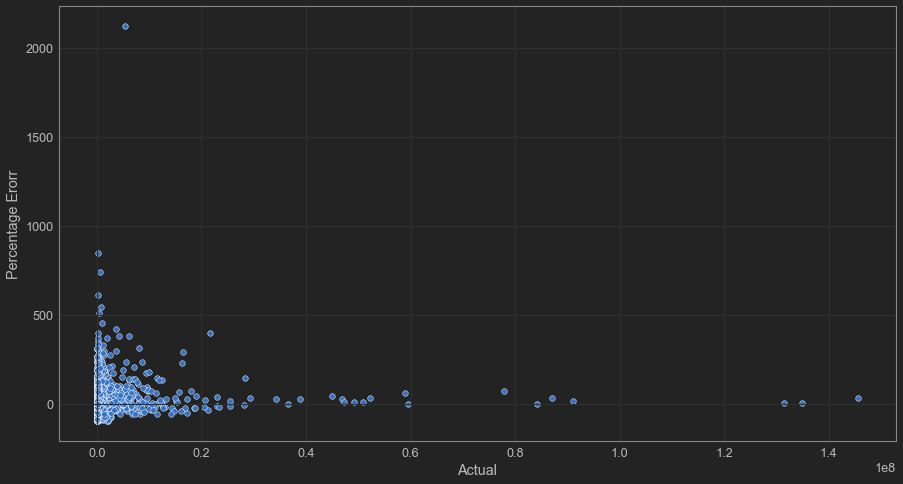

In [232]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Actual', y='Percentage Erorr',data=mergedDf)
plt.xlabel('Actual')
plt.ylabel('Percentage Erorr')
plt.savefig('outliers.jpg')
plt.show()

In [233]:
forest_result['MAPE']=abs(forest_result['Prediction']-forest_result['Actual'])/forest_result['Actual']*100

In [234]:
# There are 21053 data which exceed error value
B=forest_result[forest_result['MAPE']>12.255710383575225].drop(columns='Actual', axis=1)
B

,Prediction,MAPE
327309,40694.0,14.866109
81564,68508.0,36.093284
468839,102755.0,18.109195
327102,36198.0,34.565056
463223,99260.0,29.413299
...,...,...
478417,713835.0,19.931956
94916,114897.0,16.884028
23488,63785.0,14.497319
299672,67416.0,18.481547


In [238]:
forest_result[forest_result['MAPE']>20]

,Actual,Prediction,MAPE
81564,107200.0,68508.0,36.093284
327102,26900.0,36198.0,34.565056
463223,76700.0,99260.0,29.413299
157875,183200.0,140166.0,23.490175
208614,107200.0,185416.0,72.962687
...,...,...,...
212929,297400.0,394558.0,32.669132
171723,61700.0,80173.0,29.940032
118882,157800.0,71097.0,54.944867
120778,55200.0,68333.0,23.791667


In [239]:
index_model2=B.index

In [242]:
#We try to analyze these outlier based on top of the feature importance
C=df.loc[index_model2,['market_value','total_livable_area','number_stories','number_of_rooms','zip_code','property_age',
                       'total_area','overall_condition','number_of_rooms','category_code_description','apartment','house',
                       'condominium']].sort_values(by='market_value', ascending=False)
C

,market_value,total_livable_area,number_stories,number_of_rooms,zip_code,property_age,total_area,overall_condition,number_of_rooms,category_code_description,apartment,house,condominium
480573,145580700.0,723777.0,20.0,4.0,19107,47.0,50160.00,4.0,4.0,Commercial,0,0,0
458036,91136500.0,489553.0,17.0,16.0,19104,75.0,44325.00,2.0,16.0,Multi Family,1,0,0
478858,87075100.0,500000.0,8.0,4.0,19103,39.0,69696.00,4.0,4.0,Commercial,0,0,0
474606,77911700.0,254947.0,12.0,16.0,19121,13.0,75315.00,4.0,16.0,Multi Family,1,0,0
458759,58919400.0,245943.0,19.0,101.5,19147,40.0,30970.00,4.0,101.5,Multi Family,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68561,7100.0,3960.0,1.0,5.5,19140,90.0,1602.26,4.0,5.5,Single Family,0,1,0
101973,7000.0,962.0,2.0,4.0,19133,100.0,910.00,7.0,4.0,Single Family,0,1,0
255645,6900.0,1024.0,2.0,6.0,19142,67.0,1096.00,4.0,6.0,Single Family,0,1,0
156523,6800.0,840.0,2.0,6.0,19132,105.0,720.50,7.0,6.0,Single Family,0,1,0


In [243]:
B.join(C, how='inner')

,Prediction,MAPE,market_value,total_livable_area,number_stories,number_of_rooms,zip_code,property_age,total_area,overall_condition,number_of_rooms,category_code_description,apartment,house,condominium
327309,40694.0,14.866109,47800.0,960.0,2.0,6.0,19143,95.0,880.00,4.0,6.0,Single Family,0,1,0
81564,68508.0,36.093284,107200.0,1634.0,2.0,7.0,19132,105.0,1037.00,2.0,7.0,Single Family,0,1,0
468839,102755.0,18.109195,87000.0,2093.0,3.0,6.0,19134,85.0,1167.00,4.0,6.0,Mixed Use,1,0,0
327102,36198.0,34.565056,26900.0,1057.0,2.0,6.0,19143,95.0,880.00,5.0,6.0,Single Family,0,1,0
463223,99260.0,29.413299,76700.0,1476.0,2.0,6.0,19120,80.0,911.34,4.0,6.0,Mixed Use,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478417,713835.0,19.931956,595200.0,7125.0,1.0,4.0,19116,35.0,88200.00,4.0,4.0,Industrial,0,0,0
94916,114897.0,16.884028,98300.0,1548.0,3.0,5.0,19122,95.0,1040.00,4.0,5.0,Single Family,0,1,0
23488,63785.0,14.497319,74600.0,1268.0,2.0,6.0,19131,100.0,1299.78,4.0,6.0,Single Family,0,1,0
299672,67416.0,18.481547,56900.0,1008.0,2.0,6.0,19134,100.0,1003.05,4.0,6.0,Single Family,0,1,0


In [244]:
D=B.join(C, how='inner')

In [245]:
D.describe()

,Prediction,MAPE,market_value,total_livable_area,number_stories,number_of_rooms,zip_code,property_age,total_area,overall_condition,number_of_rooms,apartment,house,condominium
count,2.203900e+04,22039.000000,2.203900e+04,22039.000000,22039.000000,22039.000000,22039.00000,22039.000000,22039.000000,22039.000000,22039.000000,22039.000000,22039.000000,22039.000000
mean,3.327511e+05,45.610647,3.223736e+05,2969.202641,2.310427,6.829348,19133.56400,92.001134,3102.869383,3.881982,6.829348,0.179591,0.708199,0.002223
std,1.611034e+06,87.264537,1.837827e+06,11346.499915,0.764904,6.988535,12.22029,26.671824,7192.596158,1.032891,6.988535,0.383855,0.454601,0.047101
min,7.760000e+03,12.257526,6.800000e+03,600.000000,0.000000,0.000000,19102.00000,1.000000,600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.444850e+04,17.461696,6.840000e+04,1158.000000,2.000000,6.000000,19124.00000,90.000000,943.285000,4.000000,6.000000,0.000000,0.000000,0.000000
50%,1.458540e+05,25.525568,1.354000e+05,1500.000000,2.000000,6.000000,19134.00000,95.000000,1288.080000,4.000000,6.000000,0.000000,1.000000,0.000000
75%,2.707955e+05,42.492269,2.663000e+05,2178.500000,3.000000,7.000000,19144.00000,100.000000,2161.015000,4.000000,7.000000,0.000000,1.000000,0.000000
max,1.086178e+08,4183.214286,1.455807e+08,723777.000000,30.000000,154.000000,19154.00000,357.000000,99375.000000,7.000000,154.000000,1.000000,1.000000,1.000000


In [246]:
D.groupby('category_code_description').mean()

,Prediction,MAPE,market_value,total_livable_area,number_stories,number_of_rooms,zip_code,property_age,total_area,overall_condition,number_of_rooms,apartment,house,condominium
category_code_description,,,,,,,,,,,,,,
Commercial,1.197777e+06,68.993017,1.213307e+06,11043.718750,1.872944,4.813322,19131.011513,84.813322,11497.326135,4.048109,4.813322,0.000000,0.000000,0.007401
Industrial,5.522407e+05,88.311464,3.412770e+05,11385.034759,1.491979,4.213904,19131.681818,85.243316,13566.072861,4.216578,4.213904,0.000000,0.000000,0.000000
Mixed Use,2.439209e+05,36.545349,2.396717e+05,2658.296667,2.524000,6.107333,19134.285333,96.636667,1867.007633,4.180333,6.107333,0.448667,0.000000,0.000000
Multi Family,7.425843e+05,52.060534,7.142913e+05,6137.661212,2.786212,11.051970,19131.050606,90.936970,4175.581264,3.761061,11.051970,0.995455,0.000000,0.000000
Single Family,1.823826e+05,42.273184,1.779816e+05,1502.306046,2.243194,6.227665,19134.266999,92.501725,2092.775363,3.857969,6.227665,0.000000,0.997444,0.002556
Vacant Land,1.346315e+05,180.482292,4.800000e+04,1280.000000,2.000000,0.000000,19153.000000,85.000000,2000.000000,4.000000,0.000000,0.000000,0.000000,0.000000


In [270]:
pd.set_option('display.max_rows', 500)

In [249]:
D[(D['category_code_description']=='Vacant Land') | (D['category_code_description']=='Industrial')].sort_values(by='MAPE', ascending=False)

,Prediction,MAPE,market_value,total_livable_area,number_stories,number_of_rooms,zip_code,property_age,total_area,overall_condition,number_of_rooms,category_code_description,apartment,house,condominium
392127,3.535790e+05,1337.313008,24600.0,9185.0,1.0,2.0,19139,95.0,14101.90,4.0,2.0,Industrial,0,0,0
478409,2.584200e+07,1231.718732,1940500.0,275424.0,8.0,2.0,19148,80.0,52938.00,4.0,2.0,Industrial,0,0,0
476587,1.525883e+06,849.522713,160700.0,8620.0,1.0,4.0,19132,108.0,12517.00,4.0,4.0,Industrial,0,0,0
476657,1.602280e+05,533.312253,25300.0,1150.0,1.0,2.0,19138,70.0,15000.00,4.0,2.0,Industrial,0,0,0
217480,1.092320e+05,468.916667,19200.0,2255.0,1.0,4.0,19133,100.0,3802.00,4.0,4.0,Industrial,0,0,0
477416,1.083710e+05,450.106599,19700.0,3840.0,2.0,4.0,19132,95.0,6912.00,7.0,4.0,Industrial,0,0,0
452837,1.220343e+06,439.020760,226400.0,13046.0,1.0,4.0,19146,100.0,13056.00,4.0,4.0,Industrial,0,0,0
476954,2.103110e+05,437.879795,39100.0,7560.0,1.0,4.0,19132,104.0,7560.00,7.0,4.0,Industrial,0,0,0
478626,1.810363e+06,398.997519,362800.0,10001.0,1.0,4.0,19106,90.0,38400.00,4.0,4.0,Industrial,0,0,0
216291,2.301680e+05,391.811966,46800.0,6072.0,2.0,4.0,19133,70.0,2925.44,4.0,4.0,Industrial,0,0,0


In [251]:
index_model3=forest_result.index

In [258]:
E=forest_result.join(df_model.loc[index_model3])

In [265]:
E[E['category_code_description']=='Industrial'].loc[:,['Actual','Prediction','MAPE','total_livable_area','number_stories',
                        'number_of_rooms','zip_code','property_age','total_area','overall_condition','number_of_rooms',
                        'category_code_description','apartment','house',
                        'condominium']].sort_values(by='total_livable_area', ascending=False)

,Actual,Prediction,MAPE,total_livable_area,number_stories,number_of_rooms,zip_code,property_age,total_area,overall_condition,number_of_rooms,category_code_description,apartment,house,condominium
478409,1940500.0,2.584200e+07,1231.718732,275424.0,8.0,2.0,19148,80.0,52938.00,4.0,2.0,Industrial,0,0,0
477133,2686200.0,1.050265e+07,290.985407,172742.0,2.0,7.0,19122,70.0,60855.00,5.0,7.0,Industrial,0,0,0
478538,1183900.0,3.969918e+06,235.325450,98046.0,5.0,4.0,19134,115.0,32036.55,4.0,4.0,Industrial,0,0,0
477715,899100.0,1.457746e+06,62.133912,89330.0,3.0,4.0,19132,100.0,33110.00,5.0,4.0,Industrial,0,0,0
477580,1604700.0,1.499459e+06,6.558298,79162.0,2.0,4.0,19142,80.0,80494.00,4.0,4.0,Industrial,0,0,0
478112,1388500.0,3.283721e+06,136.494130,72611.0,5.0,4.0,19125,145.0,36104.00,4.0,4.0,Industrial,0,0,0
476602,6014800.0,4.757215e+06,20.908176,72000.0,3.0,2.0,19127,2.0,41356.00,1.0,2.0,Industrial,0,0,0
476715,754800.0,7.861400e+05,4.152093,67964.0,3.0,4.0,19124,90.0,50594.00,5.0,4.0,Industrial,0,0,0
477466,543900.0,9.185860e+05,68.888766,67560.0,3.0,6.0,19134,90.0,23342.28,4.0,6.0,Industrial,0,0,0
476688,805500.0,1.314902e+06,63.240472,64751.0,2.0,4.0,19124,121.0,77230.00,7.0,4.0,Industrial,0,0,0


In [266]:
E[E['category_code_description']=='Industrial'].loc[:,['Actual','Prediction','MAPE','total_livable_area','number_stories',
                        'number_of_rooms','zip_code','property_age','total_area','overall_condition','number_of_rooms',
                        'category_code_description','apartment','house',
                        'condominium']].sort_values(by='Actual', ascending=False)

,Actual,Prediction,MAPE,total_livable_area,number_stories,number_of_rooms,zip_code,property_age,total_area,overall_condition,number_of_rooms,category_code_description,apartment,house,condominium
476602,6014800.0,4.757215e+06,20.908176,72000.0,3.0,2.0,19127,2.0,41356.00,1.0,2.0,Industrial,0,0,0
480913,3417600.0,4.933880e+06,44.366807,35742.0,7.0,7.0,19107,90.0,5106.00,3.0,7.0,Industrial,0,0,0
477257,2997800.0,1.552669e+06,48.206385,20000.0,1.0,4.0,19145,60.0,89178.33,4.0,4.0,Industrial,0,0,0
477133,2686200.0,1.050265e+07,290.985407,172742.0,2.0,7.0,19122,70.0,60855.00,5.0,7.0,Industrial,0,0,0
476585,2562600.0,3.009213e+06,17.428120,30000.0,2.0,2.0,19140,90.0,34386.00,4.0,2.0,Industrial,0,0,0
478761,2367300.0,2.386916e+06,0.828623,23520.0,1.0,4.0,19123,60.0,43200.00,4.0,4.0,Industrial,0,0,0
478624,2157900.0,1.543500e+06,28.472126,13400.0,3.0,4.0,19147,80.0,48125.00,4.0,4.0,Industrial,0,0,0
479044,2041300.0,4.785991e+06,134.457992,41363.0,2.0,4.0,19104,80.0,68547.51,3.0,4.0,Industrial,0,0,0
477118,2020100.0,2.743937e+06,35.831741,12800.0,2.0,4.0,19103,220.0,6400.00,4.0,4.0,Industrial,0,0,0
478409,1940500.0,2.584200e+07,1231.718732,275424.0,8.0,2.0,19148,80.0,52938.00,4.0,2.0,Industrial,0,0,0


In [278]:
E[(E['sale_year']==2020) & (E['MAPE']>12.255710383575225)].loc[:,['Actual','Prediction','MAPE','total_livable_area','number_stories',
                        'number_of_rooms','zip_code','property_age','total_area','overall_condition','number_of_rooms',
                        'category_code_description','sale_year','apartment','house',
                        'condominium']].sort_values(by='MAPE', ascending=False)

,Actual,Prediction,MAPE,total_livable_area,number_stories,number_of_rooms,zip_code,property_age,total_area,overall_condition,number_of_rooms,category_code_description,sale_year,apartment,house,condominium
228236,14100.0,152726.0,983.163121,1472.0,1.0,5.5,19129,81.0,1810.50,4.0,5.5,Single Family,2020.0,0,1,0
62181,78300.0,455971.0,482.338442,8520.0,3.0,7.0,19144,60.0,36618.17,7.0,7.0,Single Family,2020.0,0,1,0
60142,38500.0,210760.0,447.428571,5152.0,3.0,7.0,19144,25.0,5390.40,7.0,7.0,Single Family,2020.0,0,1,0
207219,86000.0,434243.0,404.933721,2022.0,2.0,7.0,19146,95.0,1664.48,2.0,7.0,Single Family,2020.0,0,1,0
453528,453200.0,2023707.0,346.537290,10168.0,2.0,7.0,19104,158.0,8100.00,4.0,7.0,Commercial,2020.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228684,192200.0,216037.0,12.402185,1450.0,2.0,6.0,19129,77.0,4000.00,4.0,6.0,Multi Family,2020.0,1,0,0
352632,137700.0,120660.0,12.374728,1176.0,2.0,6.0,19149,70.0,1298.23,4.0,6.0,Single Family,2020.0,0,1,0
128116,261200.0,293474.0,12.356049,2772.0,3.0,6.0,19119,95.0,4013.75,4.0,6.0,Single Family,2020.0,0,1,0
75301,311900.0,350415.0,12.348509,1799.0,3.0,6.0,19130,105.0,919.80,5.0,6.0,Single Family,2020.0,0,1,0


In [280]:
F=E[(E['sale_year']==2006) | (E['sale_year']==2007) | (E['sale_year']==2008) | (E['sale_year']==2009) | 
   (E['sale_year']==2010)].loc[:,['Actual','Prediction',
                        'MAPE','total_livable_area','number_stories','number_of_rooms','zip_code','property_age',
                        'total_area','overall_condition','number_of_rooms','category_code_description','sale_year',
                        'apartment','house','condominium']].sort_values(by='MAPE', ascending=False)

In [281]:
F[F['MAPE']>12.255710383575225]

,Actual,Prediction,MAPE,total_livable_area,number_stories,number_of_rooms,zip_code,property_age,total_area,overall_condition,number_of_rooms,category_code_description,sale_year,apartment,house,condominium
214800,12500.0,1.977250e+05,1481.800000,1924.0,3.0,4.0,19133,100.0,1418.25,2.0,4.0,Single Family,2006.0,0,1,0
483373,23600.0,3.196670e+05,1254.521186,1454.0,3.0,6.0,19145,13.0,1368.00,3.0,6.0,Single Family,2006.0,0,1,0
69454,8400.0,8.713600e+04,937.333333,612.0,1.0,5.5,19140,70.0,946.80,4.0,5.5,Single Family,2008.0,0,1,0
481340,63000.0,5.984860e+05,849.977778,4152.0,3.0,12.0,19104,10.0,6043.00,1.0,12.0,Multi Family,2009.0,1,0,0
37019,11700.0,9.977433e+04,752.772080,759.0,1.0,5.5,19140,55.0,759.00,4.0,5.5,Single Family,2010.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,250000.0,2.807270e+05,12.290800,1519.0,3.0,7.0,19148,95.0,975.00,4.0,7.0,Multi Family,2007.0,1,0,0
322657,94700.0,1.063170e+05,12.267159,1140.0,2.0,6.0,19143,95.0,952.50,3.0,6.0,Single Family,2010.0,0,1,0
135407,181300.0,1.590660e+05,12.263651,1378.0,2.0,6.0,19134,55.0,3200.00,4.0,6.0,Single Family,2006.0,0,1,0
128424,154300.0,1.353830e+05,12.259883,1008.0,2.0,7.0,19119,95.0,2220.52,4.0,7.0,Single Family,2008.0,0,1,0


In [168]:
len(mergedDf[mergedDf['Percentage Erorr']>10])

10903

In [169]:
10818/96949 

0.11158444130419086

In [170]:
x.describe()

,number_of_bedrooms,number_of_rooms,number_stories,overall_condition,property_age,sale_year,total_area,total_livable_area,have_fireplaces,condominium,apartment,house,zip_code
count,484058.000000,484058.000000,484058.000000,484058.000000,484058.000000,484058.000000,484058.000000,484058.000000,484058.000000,484058.000000,484058.000000,484058.000000,484058.000000
mean,3.232274,6.394166,2.139539,3.899127,84.551655,2003.620444,2384.794287,1869.610614,0.027443,0.001603,0.099645,0.860572,19134.104791
std,1.943139,3.740895,0.588042,0.704913,25.226948,14.650499,4571.933004,7471.054943,0.163371,0.040007,0.299527,0.346392,12.833198
min,0.000000,0.000000,0.000000,0.000000,0.000000,1918.000000,600.000000,600.000000,0.000000,0.000000,0.000000,0.000000,19102.000000
25%,3.000000,6.000000,2.000000,4.000000,70.000000,1997.000000,981.500000,1107.000000,0.000000,0.000000,0.000000,1.000000,19124.000000
50%,3.000000,6.000000,2.000000,4.000000,95.000000,2007.000000,1379.700000,1290.000000,0.000000,0.000000,0.000000,1.000000,19136.000000
75%,3.000000,6.000000,2.000000,4.000000,100.000000,2015.000000,2185.355000,1650.000000,0.000000,0.000000,0.000000,1.000000,19145.000000
max,93.000000,154.000000,40.000000,7.000000,368.000000,2020.000000,99964.320000,798189.000000,1.000000,1.000000,1.000000,1.000000,19154.000000


In [171]:
mergedDf[mergedDf['Percentage Erorr']>10].describe()

,Residual,Percentage Erorr,Actual,Predicted,number_of_bedrooms,number_of_rooms,number_stories,overall_condition,property_age,sale_year,total_area,total_livable_area,have_fireplaces,condominium,apartment,house,zip_code
count,1.090300e+04,10903.000000,1.090300e+04,1.090300e+04,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000
mean,1.213008e+05,32.296622,4.710811e+05,3.497803e+05,3.378428,6.825965,2.330689,3.764193,92.023480,2005.676878,2952.954147,2839.357333,0.040172,0.002201,0.186646,0.720169,19133.347427
std,7.647377e+05,39.423121,2.607207e+06,1.943959e+06,3.200604,6.511864,0.750005,0.938033,27.478849,14.223917,6791.692869,12956.855552,0.196372,0.046868,0.389645,0.448937,12.563017
min,1.061000e+03,10.000133,9.100000e+03,7.760000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,1918.000000,600.000000,600.000000,0.000000,0.000000,0.000000,0.000000,19102.000000
25%,2.097900e+04,14.515918,1.269500e+05,9.726500e+04,3.000000,6.000000,2.000000,4.000000,90.000000,2000.000000,944.000000,1152.000000,0.000000,0.000000,0.000000,0.000000,19124.000000
50%,3.876400e+04,22.135668,2.093000e+05,1.651580e+05,3.000000,6.000000,2.000000,4.000000,95.000000,2010.000000,1280.000000,1489.000000,0.000000,0.000000,0.000000,1.000000,19134.000000
75%,7.824200e+04,36.748407,3.745000e+05,2.934515e+05,4.000000,7.000000,3.000000,4.000000,100.000000,2016.000000,2155.050000,2160.000000,0.000000,0.000000,0.000000,1.000000,19145.000000
max,3.696288e+07,2121.550085,1.455807e+08,1.086178e+08,77.000000,154.000000,20.000000,7.000000,357.000000,2020.000000,93992.500000,723777.000000,1.000000,1.000000,1.000000,1.000000,19154.000000


In [172]:
list(forest_pipe[0].transformers_[0][1].get_feature_names_out())#Feature name at one hot encoder

['central_air_N',
 'central_air_Y',
 'have_fireplaces_1',
 'other_building_Y',
 'unfinished_U']

In [173]:
forest_pipe[0].transformers_[1][1].get_feature_names() #Feature name at binary encoder

['category_code_description_0',
 'category_code_description_1',
 'category_code_description_2',
 'distance_city_center_0',
 'distance_city_center_1',
 'distance_city_center_2',
 'new_zoning_0',
 'new_zoning_1',
 'new_zoning_2',
 'new_zoning_3',
 'parcel_shape_0',
 'parcel_shape_1',
 'parcel_shape_2',
 'parking_spaces_0',
 'parking_spaces_1',
 'parking_spaces_2',
 'street_designation_0',
 'street_designation_1',
 'street_designation_2',
 'street_designation_3',
 'street_designation_4',
 'topography_0',
 'topography_1',
 'topography_2',
 'view_type_0',
 'view_type_1',
 'view_type_2',
 'view_type_3',
 'zip_code']

In [174]:
forest_pipe[0].transformers_[2][2]

['total_area', 'total_livable_area', 'property_age']

In [175]:
features=list(forest_pipe[0].transformers_[0][1].get_feature_names_out()) + forest_pipe[0].transformers_[1][1].get_feature_names() + forest_pipe[0].transformers_[2][2]+['number_of_bedrooms','number_of_rooms','number_stories','overall_condition','sale_year','condominium', 'apartment', 'house']

In [176]:
importance_table=pd.DataFrame({'importance': forest_pipe[1].feature_importances_}, index=features)
importance_table.sort_values(by='importance', ascending=False)

,importance
total_livable_area,0.774978
number_stories,0.050190
zip_code,0.038682
property_age,0.038640
total_area,0.026035
sale_year,0.014442
overall_condition,0.013502
number_of_rooms,0.006070
distance_city_center_1,0.005507
central_air_Y,0.005136


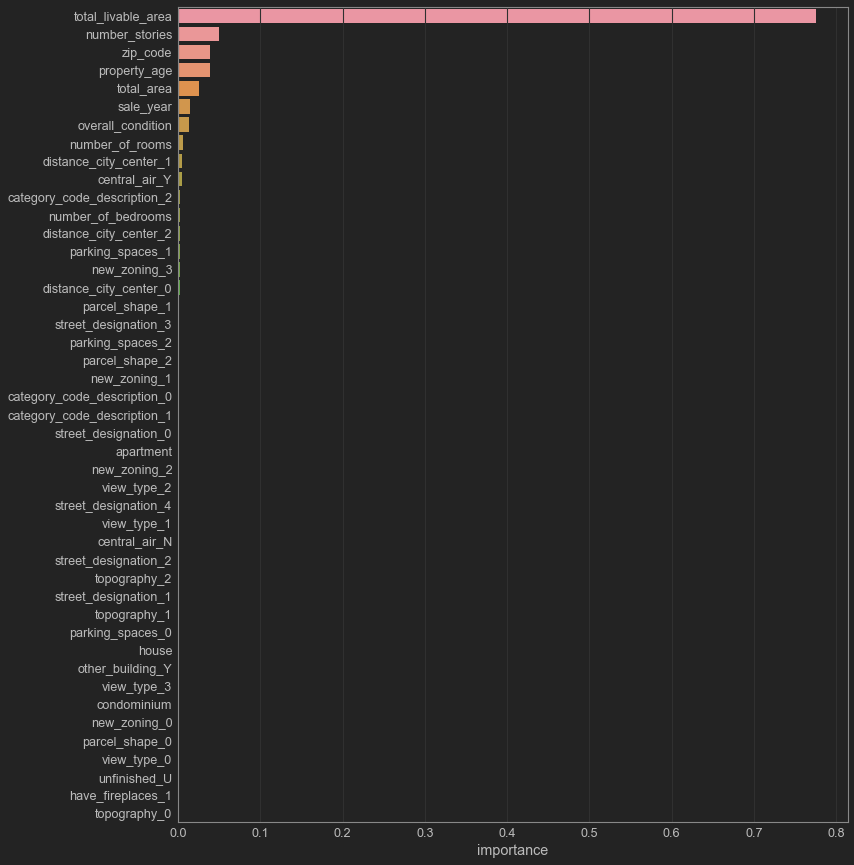

In [282]:
plt.figure(figsize=(12,15))
sns.barplot(data=importance_table.sort_values(by='importance', ascending=False), 
            x='importance', y=importance_table.sort_values(by='importance', ascending=False).index, orient='h')
plt.savefig('importance2.jpg')
plt.show()

11% of our prediction has percentage error more than 10%, if we see on the comparison between `x` and `Mergedf` description there is difference on total livable area. The median of total livable area with more than 10% error is slightly higher, but we must see on the feature importance. The feature importance plot show that total livable area is very important, so although the difference on total livable area is small that can give big impact to the market value.

# Random Forest Hyperparameter Tunning

In order to improve random forest model metric score, we will do some hyperparameter tunning in Randomized Search CV to cut processing time.

In [140]:
forest_pipe.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('one hot', OneHotEncoder(drop='first'),
                                    ['central_air', 'have_fireplaces',
                                     'other_building', 'unfinished']),
                                   ('binary', BinaryEncoder(),
                                    ['category_code_description',
                                     'distance_city_center', 'new_zoning',
                                     'parcel_shape', 'parking_spaces',
                                     'street_designation', 'topography',
                                     'view_type']),
                                   ('scaling', RobustScaler(),
                                    ['total_area', 'total_livable_area',
                                     'property_age'])])),
  ('model', RandomForestRegressor(random_state=2020))],
 'verbose': False,
 'preprocessing': Col

In [129]:
# Choosing parameter
criterion=['squared_error','absolute_error']
max_depth=[2,3,4,5,6,7]
min_samples_leaf=[5,10,15,20,25,30,35,40,45,50,60,70,80,90,100]
min_samples_split=[5,10,15,20,25,30,35,40,45,50,60,70,80,90,100]

forest_param={
    'model__criterion':criterion,
    'model__max_depth':max_depth,
    'model__min_samples_leaf':min_samples_leaf,
    'model__min_samples_split':min_samples_split,
}

In [130]:
forest_grid= RandomizedSearchCV(
    forest_pipe,
    param_distributions=forest_param,
    cv=3,
    n_iter=10,
    scoring='neg_mean_absolute_percentage_error',
    n_jobs=-1
)

In [131]:
# forest_grid.fit(x_train,y_train)

In [132]:
# print('best score', xgb_grid.best_score_)
# print('best param', xgb_grid.best_params_)

In [133]:
# pd.DataFrame(xgb_grid.cv_results_)

We try to do the hyper-parameter tunning but because of the limited time and it still running after 9 hours process so we stop the process. Other than that the model before tunning is already good.